# **IPL 2022 Data Analysis** 

#### Import Libraries

In [147]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [148]:
%pwd

'C:\\Users\\nsidd\\IPL_22 Blog'

In [161]:
%cd C:\Users\nsidd\IPL_22 Blog

C:\Users\nsidd\IPL_22 Blog


In [162]:
#Top 2 Rows
df = pd.read_excel('IPL_2022.xlsx')
df.head(2)

,id,season,city,date,team1,Pplay T1,pplay twick1,team2,Pplay T2,pplay twick2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,22001,2022,Mumbai,2022-03-26 00:00:00,Chennai Super Kings,35,2,Kolkata Knight Riders,43,0,Kolkata Knight Riders,Bowl,normal,0,Kolkata Knight Riders,0,6,Umesh Yadav,Wankhade Stadium
1,22002,2022,Mumbai,2022-03-27 00:00:00,Delhi Capitals,46,3,Mumbai Indians,53,0,Delhi Capitals,Bowl,normal,0,Delhi Capitals,0,4,Kuldeep Yadav,Brabourne Stadium


In [163]:
#Dropping Unnecessary Columns (depends on our analysis)
df.drop(['id','season','date','dl_applied'],axis=1,inplace=True)
df.head(2)

,city,team1,Pplay T1,pplay twick1,team2,Pplay T2,pplay twick2,toss_winner,toss_decision,result,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,Mumbai,Chennai Super Kings,35,2,Kolkata Knight Riders,43,0,Kolkata Knight Riders,Bowl,normal,Kolkata Knight Riders,0,6,Umesh Yadav,Wankhade Stadium
1,Mumbai,Delhi Capitals,46,3,Mumbai Indians,53,0,Delhi Capitals,Bowl,normal,Delhi Capitals,0,4,Kuldeep Yadav,Brabourne Stadium


#### Number of Wins by Each Team

<AxesSubplot:title={'center':'Number of Wins by Each Team'}>

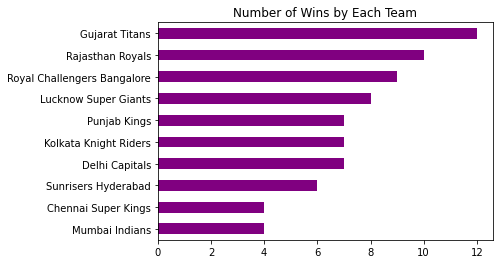

In [164]:
df['winner'].value_counts().sort_values(ascending=True).plot(kind='barh', title='Number of Wins by Each Team', color ='purple')

#### Toss Decision vs Toss Winner

<AxesSubplot:title={'center':'Toss Decision vs Toss Winner'}, ylabel='toss_decision,toss_winner'>

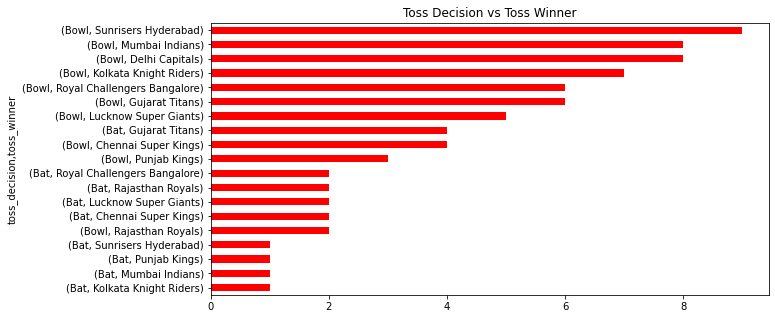

In [166]:
df.groupby(['toss_decision'])['toss_winner'].value_counts().sort_values(ascending=True).plot(kind='barh', color="red", figsize=(10,5), title = "Toss Decision vs Toss Winner")

In [168]:
%cd C:\\Users\\nsidd\\IPL_22 Blog\\Teamwise Data

C:\Users\nsidd\IPL_22 Blog\Teamwise Data


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Kolkata Knight Riders'),
  Text(1, 0, 'Delhi Capitals'),
  Text(2, 0, 'Punjab Kings'),
  Text(3, 0, 'Gujarat Titans'),
  Text(4, 0, 'Sunrisers Hyderabad'),
  Text(5, 0, 'Royal Challengers Bangalore'),
  Text(6, 0, 'Lucknow Super Giants'),
  Text(7, 0, 'Mumbai Indians'),
  Text(8, 0, 'Chennai Super Kings'),
  Text(9, 0, 'Rajasthan Royals')])

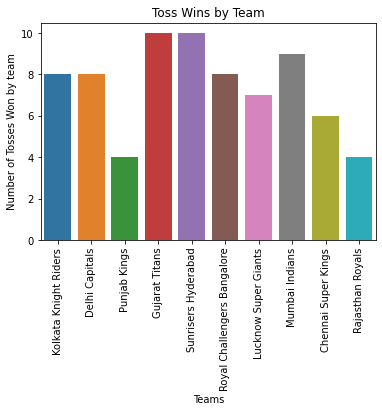

In [169]:
sns.countplot('toss_winner', data=df)
plt.title("Toss Wins by Team")
plt.ylabel('Number of Tosses Won by team')
plt.xlabel('Teams')
plt.xticks(rotation= 'vertical',size=10)

<AxesSubplot:xlabel='toss_decision', ylabel='count'>

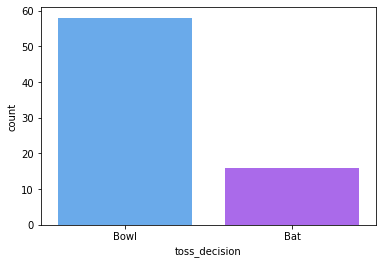

In [176]:
sns.countplot('toss_decision', data=df,palette="cool")

In [177]:
df['toss_decision'].value_counts(normalize = True)

Bowl    0.783784
Bat     0.216216
Name: toss_decision, dtype: float64

#### 78% of time teams have decided to Bowl First 😃

<AxesSubplot:title={'center':'Matches Played at Venue & City'}, ylabel='venue,city'>

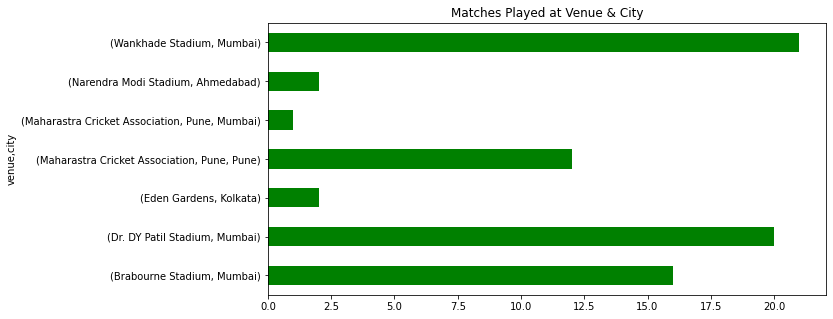

In [217]:
df.groupby(['venue'])['city'].value_counts().plot(kind="barh",figsize=(10,5), color="Green", title = "Matches Played at Venue & City")

<AxesSubplot:title={'center':'Top 15 MOM Awards won by players'}>

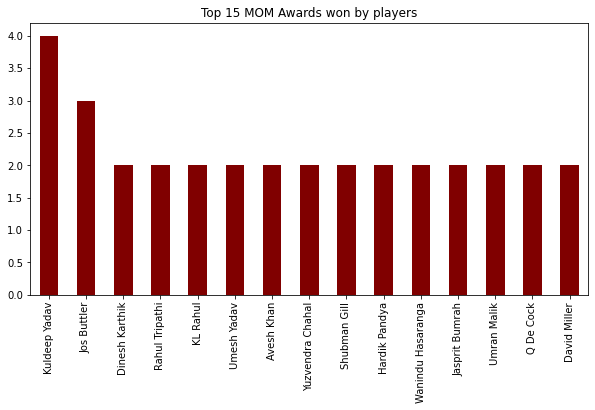

In [218]:
df['player_of_match'].value_counts().sort_values(ascending = False)[0:15].plot(kind='bar',figsize=(10,5),color='maroon', title = 'Top 15 MOM Awards won by players')

#### Teamwise Data Analysis

In [219]:
%cd C:\Users\nsidd\OneDrive\Desktop\IPL 2022\IPL TEAMS

C:\Users\nsidd\OneDrive\Desktop\IPL 2022\IPL TEAMS


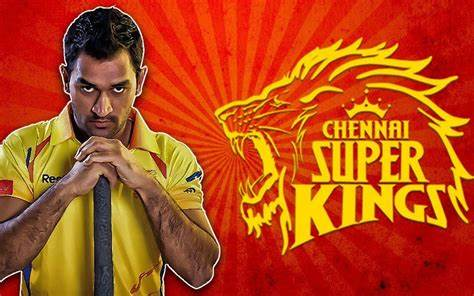

In [223]:
csk = pd.read_excel('CSK.xlsx')
csk.drop(['id','season','date','dl_applied'],axis=1,inplace=True)
csk.head(3)

,city,team1,Pplay T1,pplay twick1,team2,Pplay T2,pplay twick2,toss_winner,toss_decision,result,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,Mumbai,Chennai Super Kings,35,2,Kolkata Knight Riders,43,0,Kolkata Knight Riders,Bowl,normal,Kolkata Knight Riders,0,6,Umesh Yadav,Wankhade Stadium
1,Mumbai,Chennai Super Kings,73,1,Lucknow Super Giants,55,0,Lucknow Super Giants,Bowl,normal,Lucknow Super Giants,0,6,Evin Lewis,Brabourne Stadium
2,Mumbai,Chennai Super Kings,27,4,Punjab Kings,72,2,Chennai Super Kings,Bowl,normal,Punjab Kings,54,0,Liam Livingstone,Brabourne Stadium


#### Function to get all Data related to Powerplay wrt Batting. 

In [246]:
def PP_Batting(i):
    # --------------------->Runs Scored<-----------------------------------------------------
    runs_scored = i['Pplay T1'].sum()    
    # --------------------->Wickets Lost in PP<-----------------------------------------------
    wickets_lost = i['pplay twick1'].sum()
    # --------------------->Player of the Match<----------------------------------------------
    mom = i['player_of_match'].value_counts()
    # ----------------------> Number of Matches <---------------------------------------------
    print("<---------------------------Number of Wins Team Wise-------------------------------->")  
    wins = i['winner'].value_counts()     
    print(wins)
    number_of_matches = len(i)
    print('<-----------------------Batting Powerplay Stats------------------------------------->')
    toss_wins = i.groupby(['toss_decision'])['toss_winner'].value_counts()
    print("Toss Wins \n",toss_wins)
    print('<--------------------------------------------------------------->')
    print("Player of the Match")
    print('<--------------------------------------------------------------->')
    print("Man of the Match \n", mom)
    print('<--------------------------------------------------------------->')
    min_pp_score = i['Pplay T1'].min()
    print("Lowest PP Score while Batting:-",min_pp_score)
    print('<--------------------------------------------------------------->')
    max_pp_score = i['Pplay T1'].max()
    print("Highest PP Score while Batting:-",max_pp_score)
    print('<--------------------------------------------------------------->')
    wicketless_pp = len(i[i['pplay twick1']==0])
    print("No. of times Wicketless in PP while Batting:-",wicketless_pp)
    print('<--------------------------------------------------------------->')
    max_wickets_lost = i['pplay twick1'].max()
    print("Max Wickets Lost in PP:- ",max_wickets_lost)
    print('<--------------------------------------------------------------->')
    score_mean = len(i[i['Pplay T1']>=i['Pplay T1'].mean()])
    print('No. times Score is greater than Avg. PP Score:-', score_mean)
    overs_bowled = number_of_matches*6
    print("Overs Bowled",overs_bowled)
    avg_pp = (runs_scored/number_of_matches)
    rpo = runs_scored/overs_bowled
    Stats = pd.DataFrame.from_dict({"Matches Played":number_of_matches,'Runs Scored in PP':runs_scored,'wickets_lost':wickets_lost, "Average Powerplay Score":avg_pp,"Runs Per Over":rpo, "Highest Score in PP":max_pp_score, "Lowest Score in PP":min_pp_score, "Number of times Wicketless in PP":wicketless_pp,"Max Wickets lost":max_wickets_lost, 'No. of Times Score > Mean PP Score':score_mean}, orient='index', columns=['Value'])
    Stats = Stats.transpose()
    return Stats

In [247]:
PP_Batting(csk)

<---------------------------Number of Wins Team Wise-------------------------------->
Chennai Super Kings            4
Punjab Kings                   2
Gujarat Titans                 2
Sunrisers Hyderabad            1
Rajasthan Royals               1
Mumbai Indians                 1
Lucknow Super Giants           1
Kolkata Knight Riders          1
Royal Challengers Bangalore    1
Name: winner, dtype: int64
<-----------------------Batting Powerplay Stats------------------------------------->
Toss Wins 
 toss_decision  toss_winner                
Bat            Chennai Super Kings            2
Bowl           Chennai Super Kings            4
               Sunrisers Hyderabad            2
               Delhi Capitals                 1
               Gujarat Titans                 1
               Kolkata Knight Riders          1
               Lucknow Super Giants           1
               Mumbai Indians                 1
               Royal Challengers Bangalore    1
Name: toss_winner

,Matches Played,Runs Scored in PP,wickets_lost,Average Powerplay Score,Runs Per Over,Highest Score in PP,Lowest Score in PP,Number of times Wicketless in PP,Max Wickets lost,No. of Times Score > Mean PP Score
Value,14.0,630.0,23.0,45.0,7.5,75.0,27.0,3.0,5.0,6.0


In [33]:
# toss Decision, toss winner, MOM, No. of matches, Runs in PP, Wickets Lost, Avg PP Runs, Overs Bowled, RPO, Max & min PP runs, Wicketless

#### Function to get all Data related to Powerplay wrt Bowling. 

In [251]:
def PP_Bowling(i):
    # --------------------->Runs Conceeded<-----------------------------------------------------
    runs_conceeded = i['Pplay T2'].sum()
    
    # --------------------->Wickets Lost in PP<-----------------------------------------------
    
    wickets_picked = i['pplay twick2'].sum()
    
    
    # ----------------------> Number of Matches <---------------------------------------------
    number_of_matches = len(i)
    
    min_pp_runs_conceeded = i['Pplay T2'].min()
    #print("Lowest Runs Conceeded in PP",min_pp_runs_conceeded)
    #print('<--------------------------------------------------------------->')
    max_pp_runs_conceeded = i['Pplay T2'].max()
    #print("Highest Runs Conceeded in PP",max_pp_runs_conceeded)
    #print('<--------------------------------------------------------------->')
    max_wickets_picked = i['pplay twick2'].max()
    #print(max_wickets_picked)
    
    overs_bowled = len(i)*6
    
    economy = (runs_conceeded/overs_bowled)
    

    Stats_Bowling = pd.DataFrame.from_dict({"Matches Played":number_of_matches,'Runs Conceeded':runs_conceeded,'Wickets Picked':wickets_picked, "Economy":economy,"Total Overs Bowled":overs_bowled, "Lowest Conceeded Runs":min_pp_runs_conceeded,"Highest Conceeded Runs":max_pp_runs_conceeded, "Max Wickets Picked in PP":max_wickets_picked}, orient='index', columns=['Value'])
    Stats_Bowling = Stats_Bowling.transpose()
    return Stats_Bowling

In [252]:
PP_Bowling(csk)

,Matches Played,Runs Conceeded,Wickets Picked,Economy,Total Overs Bowled,Lowest Conceeded Runs,Highest Conceeded Runs,Max Wickets Picked in PP
Value,14.0,680.0,21.0,8.095238,84.0,36.0,72.0,4.0


#### Overall Powerplay Runs & Wickets Stats of CSK vs Other Teams

<AxesSubplot:title={'center':'Wickets Picked by CSK Vs Each Team'}, ylabel='team2'>

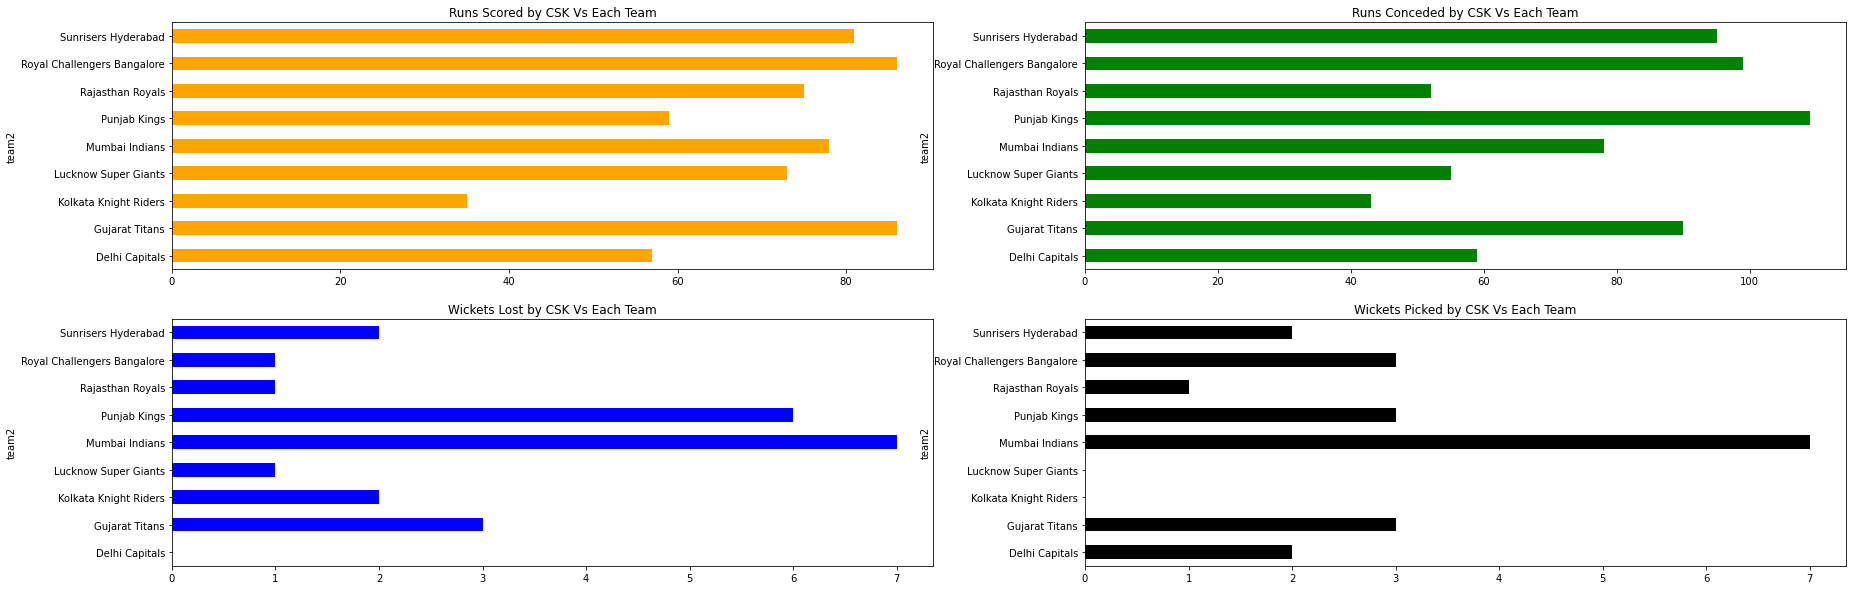

In [253]:
fig, axarr = plt.subplots(2, 2, figsize=(30,10))
csk.groupby(['team2'])['Pplay T1'].sum().plot(kind="barh",color = "Orange",ax=axarr[0][0],title="Runs Scored by CSK Vs Each Team")
csk.groupby(['team2'])['Pplay T2'].sum().plot(kind="barh",color = "Green",ax=axarr[0][1],title="Runs Conceded by CSK Vs Each Team")
csk.groupby(['team2'])['pplay twick1'].sum().plot(kind="barh",color = "Blue",ax=axarr[1][0],title="Wickets Lost by CSK Vs Each Team")
csk.groupby(['team2'])['pplay twick2'].sum().plot(kind="barh",color = "Black",ax=axarr[1][1],title="Wickets Picked by CSK Vs Each Team")

#### -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

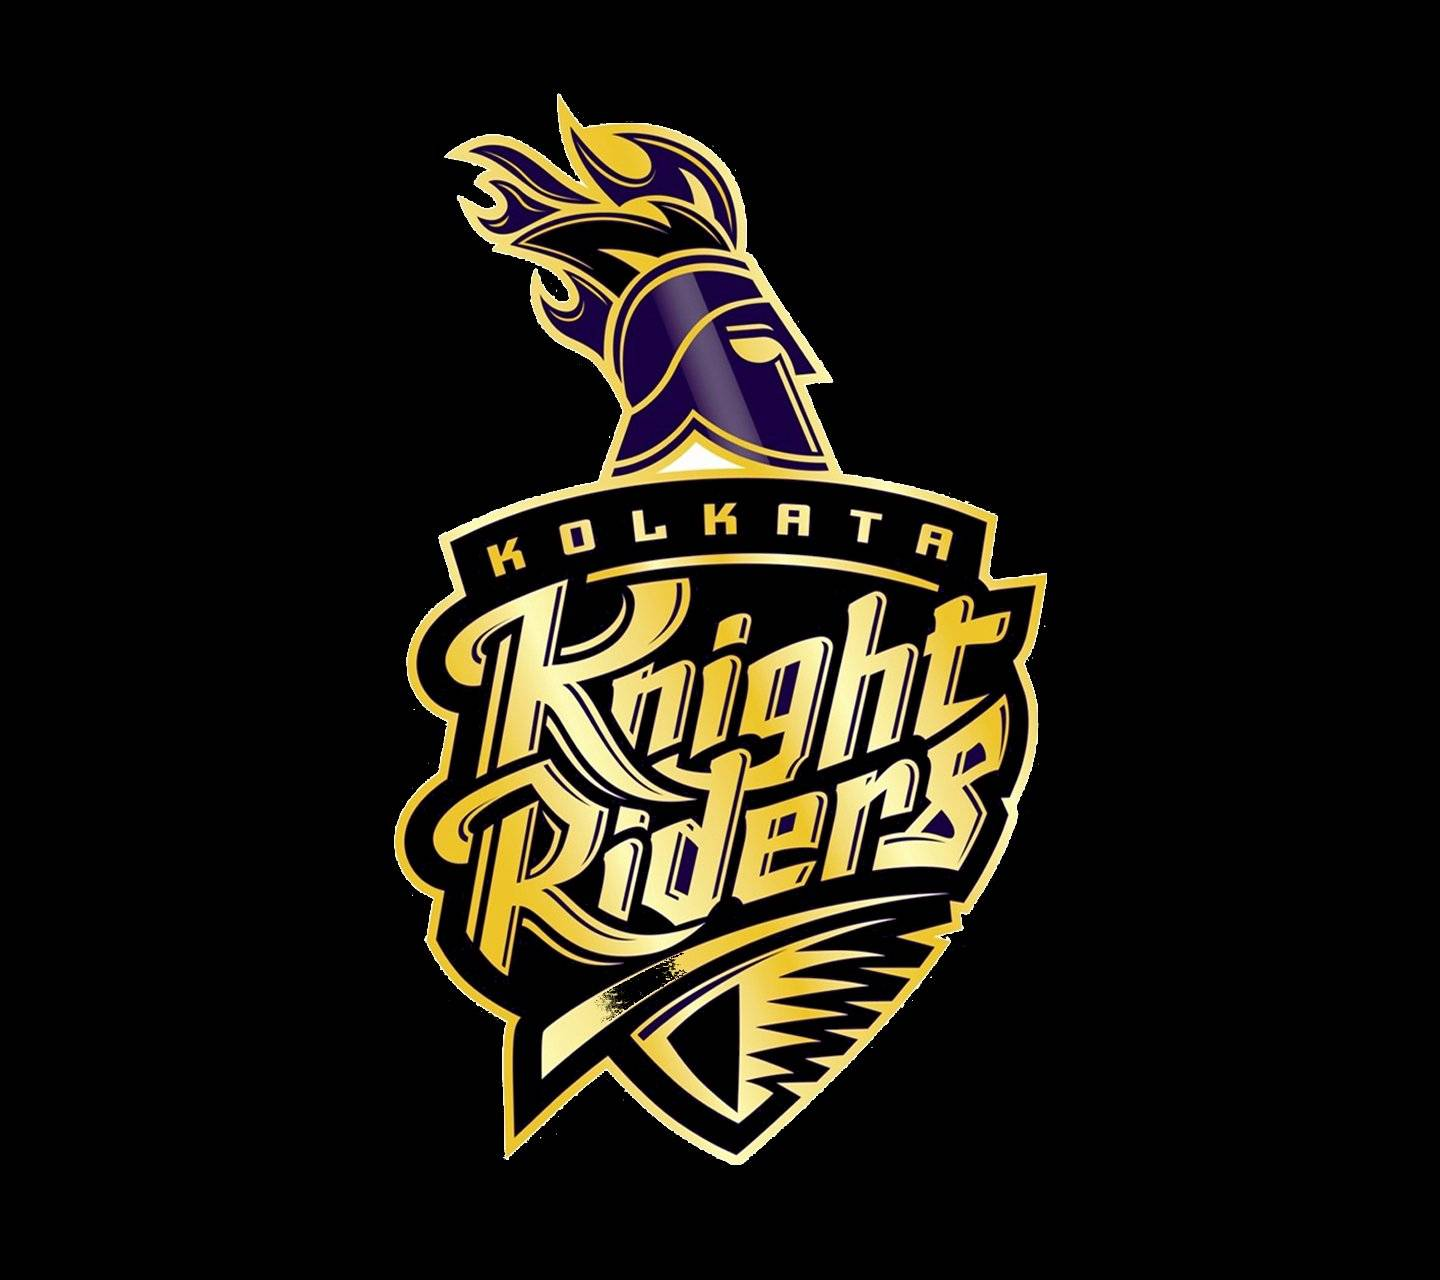

In [254]:
kkr = pd.read_excel('KKR.xlsx')
kkr.head(3)

,id,season,city,date,team1,Pplay T1,pplay twick1,team2,Pplay T2,pplay twick2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,22001,2022,Mumbai,2022-03-26,Kolkata Knight Riders,43,0,Chennai Super Kings,35,2,Kolkata Knight Riders,Bowl,normal,0,Kolkata Knight Riders,0,6,Umesh Yadav,Wankhade Stadium
1,22006,2022,Mumbai,2022-03-30,Kolkata Knight Riders,44,3,Royal Challengers Bangalore,36,3,Royal Challengers Bangalore,Bowl,normal,0,Royal Challengers Bangalore,0,3,Wanindu Hasaranga,Dr. DY Patil Stadium
2,22008,2022,Mumbai,2022-04-01,Kolkata Knight Riders,51,2,Punjab Kings,62,3,Kolkata Knight Riders,Bowl,normal,0,Kolkata Knight Riders,0,6,Umesh Yadav,Wankhade Stadium


In [255]:
PP_Batting(kkr)

<---------------------------Number of Wins Team Wise-------------------------------->
Kolkata Knight Riders          6
Delhi Capitals                 2
Lucknow Super Giants           2
Sunrisers Hyderabad            1
Rajasthan Royals               1
Royal Challengers Bangalore    1
Gujarat Titans                 1
Name: winner, dtype: int64
<-----------------------Batting Powerplay Stats------------------------------------->
Toss Wins 
 toss_decision  toss_winner                
Bat            Gujarat Titans                 1
               Kolkata Knight Riders          1
               Lucknow Super Giants           1
Bowl           Kolkata Knight Riders          7
               Delhi Capitals                 1
               Mumbai Indians                 1
               Royal Challengers Bangalore    1
               Sunrisers Hyderabad            1
Name: toss_winner, dtype: int64
<--------------------------------------------------------------->
Player of the Match
<------------

,Matches Played,Runs Scored in PP,wickets_lost,Average Powerplay Score,Runs Per Over,Highest Score in PP,Lowest Score in PP,Number of times Wicketless in PP,Max Wickets lost,No. of Times Score > Mean PP Score
Value,14.0,610.0,27.0,43.571429,7.261905,64.0,25.0,1.0,3.0,6.0


#### Overall Powerplay Runs & Wickets Stats of KKR vs Other Teams

<AxesSubplot:title={'center':'Wickets Picked by KKR Vs Each Team'}, ylabel='team2'>

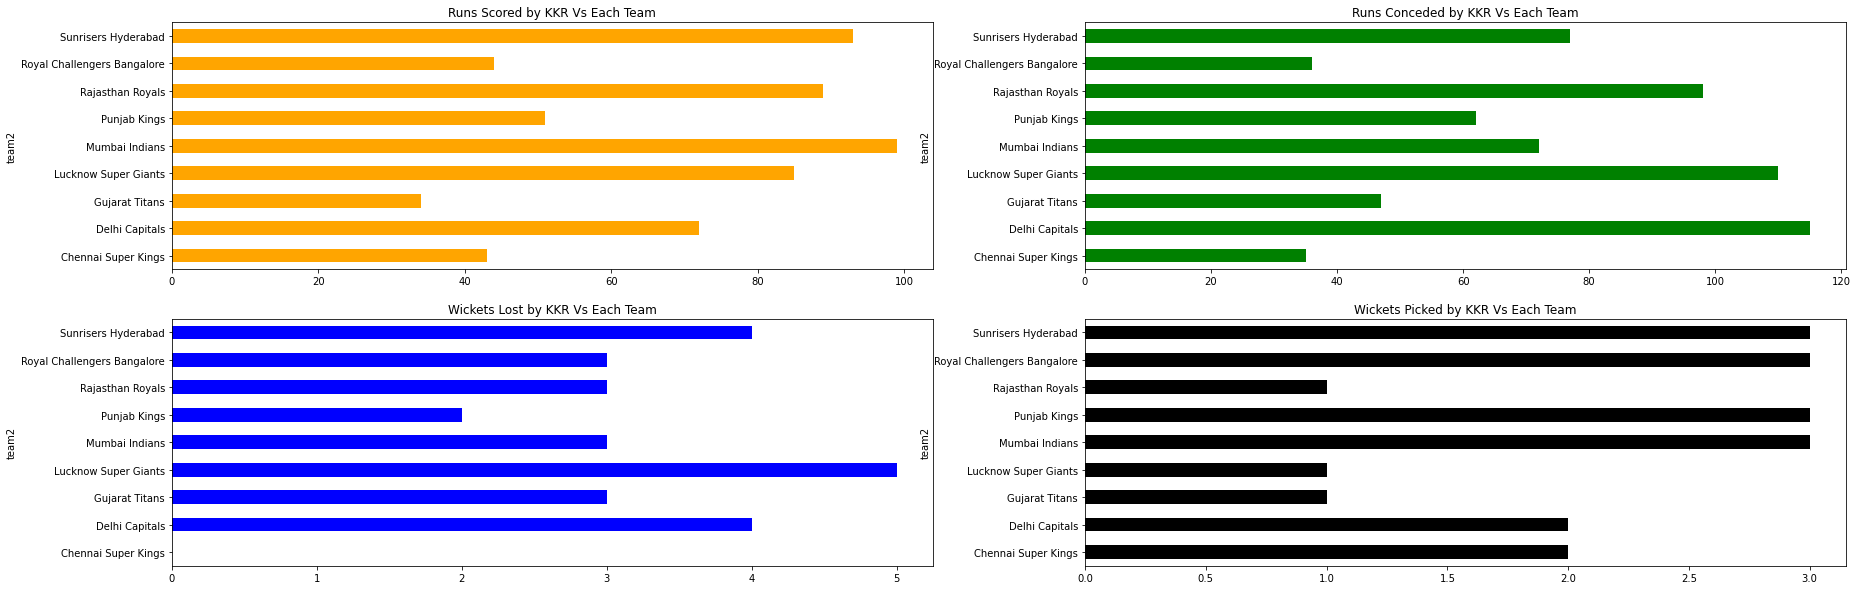

In [256]:
fig, axarr = plt.subplots(2, 2, figsize=(30,10))
kkr.groupby(['team2'])['Pplay T1'].sum().plot(kind="barh",color = "Orange",ax=axarr[0][0],title="Runs Scored by KKR Vs Each Team")
kkr.groupby(['team2'])['Pplay T2'].sum().plot(kind="barh",color = "Green",ax=axarr[0][1],title="Runs Conceded by KKR Vs Each Team")
kkr.groupby(['team2'])['pplay twick1'].sum().plot(kind="barh",color = "Blue",ax=axarr[1][0],title="Wickets Lost by KKR Vs Each Team")
kkr.groupby(['team2'])['pplay twick2'].sum().plot(kind="barh",color = "Black",ax=axarr[1][1],title="Wickets Picked by KKR Vs Each Team")

<AxesSubplot:>

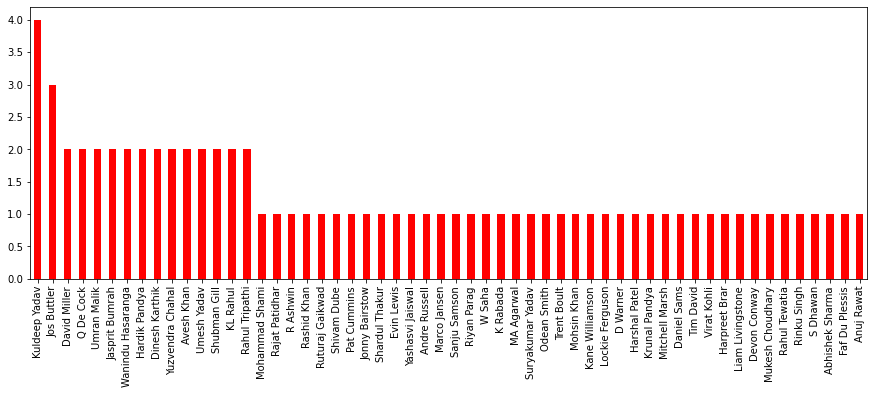

In [257]:
df['player_of_match'].value_counts().plot(kind="bar",figsize=(15,5),color="red")

In [258]:
PP_Bowling(kkr)

,Matches Played,Runs Conceeded,Wickets Picked,Economy,Total Overs Bowled,Lowest Conceeded Runs,Highest Conceeded Runs,Max Wickets Picked in PP
Value,14.0,652.0,19.0,7.761905,84.0,31.0,68.0,3.0


#### -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

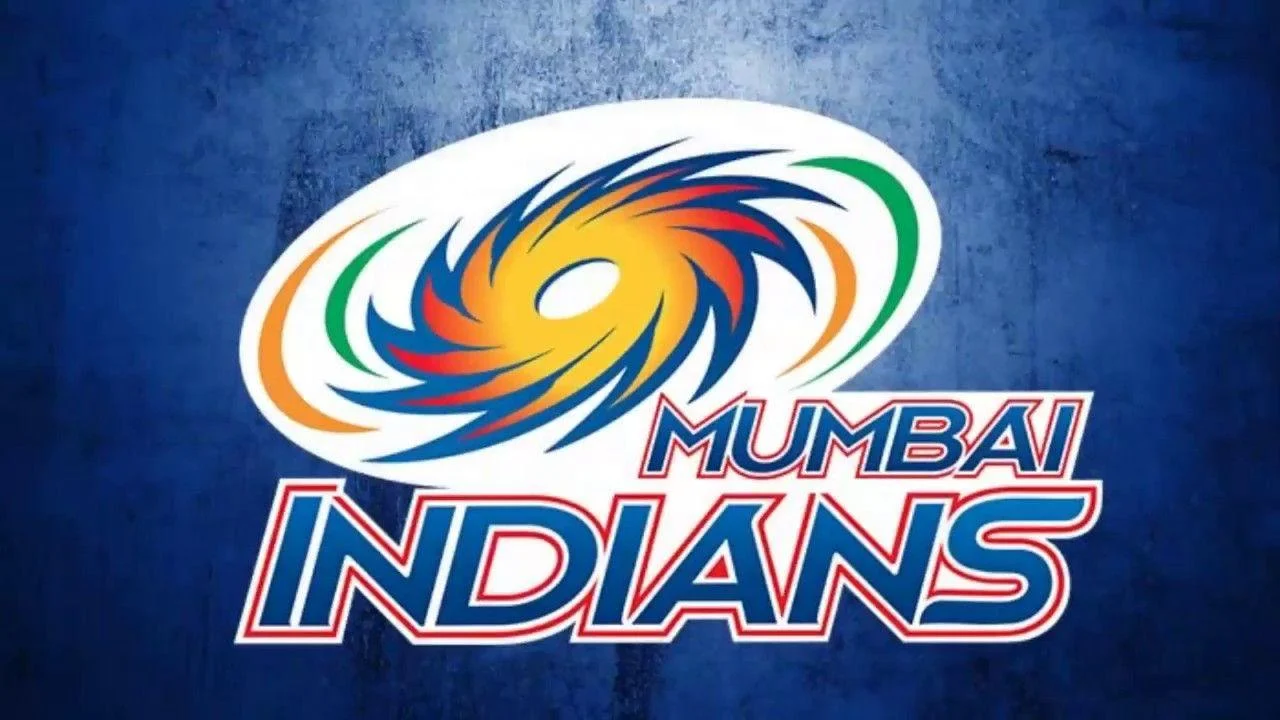

In [262]:
MI = pd.read_excel("MI.xlsx")
MI.head(3)

,id,season,city,date,team1,Pplay T1,pplay twick1,team2,Pplay T2,pplay twick2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,22002,2022,Mumbai,2022-03-27,Mumbai Indians,53,0,Delhi Capitals,46,3,Delhi Capitals,Bowl,normal,0,Delhi Capitals,0,4,Kuldeep Yadav,Brabourne Stadium
1,22009,2022,Mumbai,2022-04-02,Mumbai Indians,50,2,Rajasthan Royals,48,2,Mumbai Indians,Bowl,normal,0,Rajasthan Royals,23,0,Jos Buttler,Dr. DY Patil Stadium
2,22014,2022,Pune,2022-04-06,Mumbai Indians,35,1,Kolkata Knight Riders,35,2,Kolkata Knight Riders,Bowl,normal,0,Kolkata Knight Riders,0,5,Pat Cummins,"Maharastra Cricket Association, Pune"


In [263]:
PP_Batting(MI)

<---------------------------Number of Wins Team Wise-------------------------------->
Mumbai Indians                 4
Lucknow Super Giants           2
Kolkata Knight Riders          2
Delhi Capitals                 1
Sunrisers Hyderabad            1
Rajasthan Royals               1
Punjab Kings                   1
Royal Challengers Bangalore    1
Chennai Super Kings            1
Name: winner, dtype: int64
<-----------------------Batting Powerplay Stats------------------------------------->
Toss Wins 
 toss_decision  toss_winner                
Bat            Mumbai Indians                 1
Bowl           Mumbai Indians                 8
               Chennai Super Kings            1
               Delhi Capitals                 1
               Gujarat Titans                 1
               Kolkata Knight Riders          1
               Royal Challengers Bangalore    1
Name: toss_winner, dtype: int64
<--------------------------------------------------------------->
Player of the M

,Matches Played,Runs Scored in PP,wickets_lost,Average Powerplay Score,Runs Per Over,Highest Score in PP,Lowest Score in PP,Number of times Wicketless in PP,Max Wickets lost,No. of Times Score > Mean PP Score
Value,14.0,626.0,19.0,44.714286,7.452381,63.0,27.0,5.0,4.0,6.0


In [264]:
PP_Bowling(MI)

,Matches Played,Runs Conceeded,Wickets Picked,Economy,Total Overs Bowled,Lowest Conceeded Runs,Highest Conceeded Runs,Max Wickets Picked in PP
Value,14.0,643.0,22.0,7.654762,84.0,30.0,65.0,5.0


#### Overall Powerplay Runs & Wickets Stats of MI vs Other Teams

<AxesSubplot:title={'center':'Wickets Picked by MI Vs Each Team'}, ylabel='team2'>

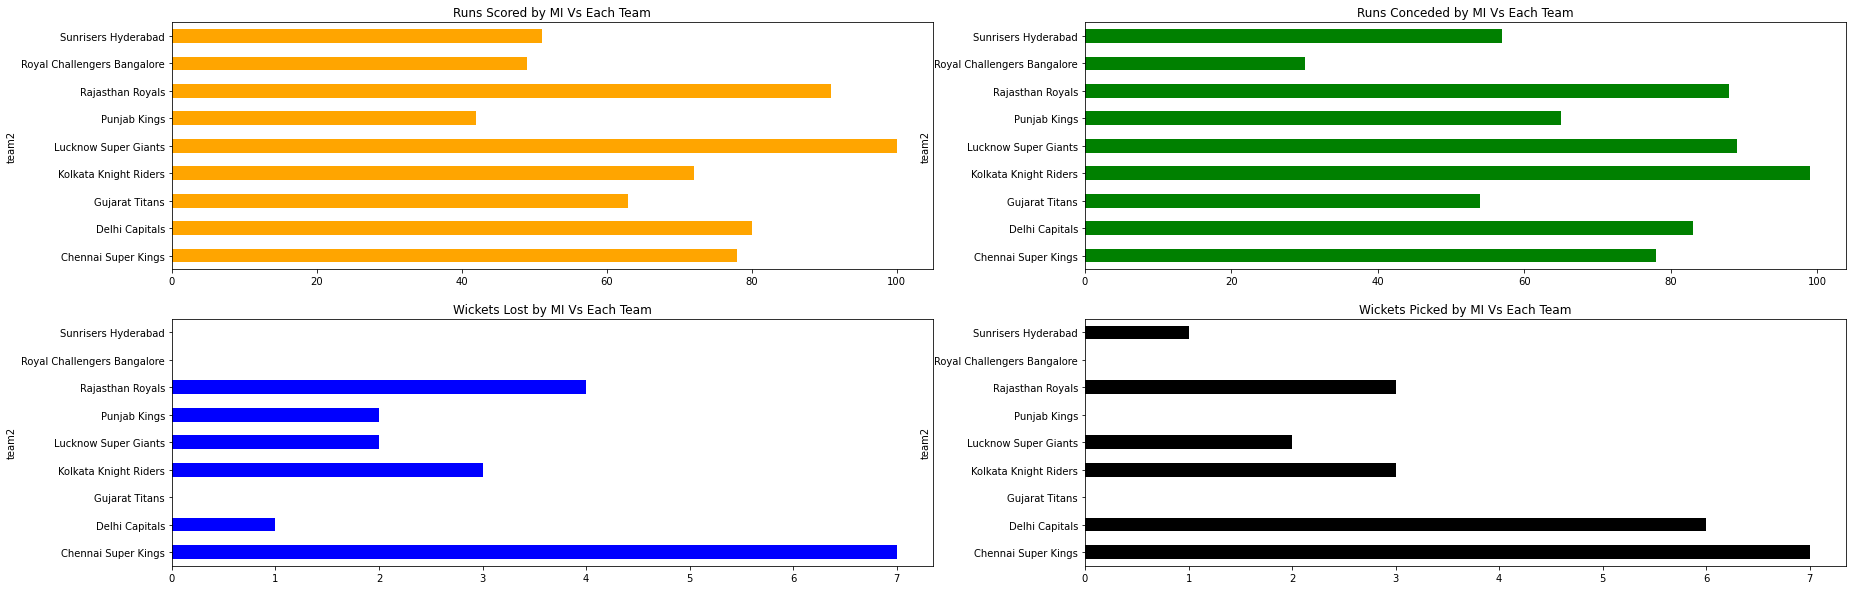

In [265]:
fig, axarr = plt.subplots(2, 2, figsize=(30,10))
MI.groupby(['team2'])['Pplay T1'].sum().plot(kind="barh",color = "Orange",ax=axarr[0][0],title="Runs Scored by MI Vs Each Team")
MI.groupby(['team2'])['Pplay T2'].sum().plot(kind="barh",color = "Green",ax=axarr[0][1],title="Runs Conceded by MI Vs Each Team")
MI.groupby(['team2'])['pplay twick1'].sum().plot(kind="barh",color = "Blue",ax=axarr[1][0],title="Wickets Lost by MI Vs Each Team")
MI.groupby(['team2'])['pplay twick2'].sum().plot(kind="barh",color = "Black",ax=axarr[1][1],title="Wickets Picked by MI Vs Each Team")

#### -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

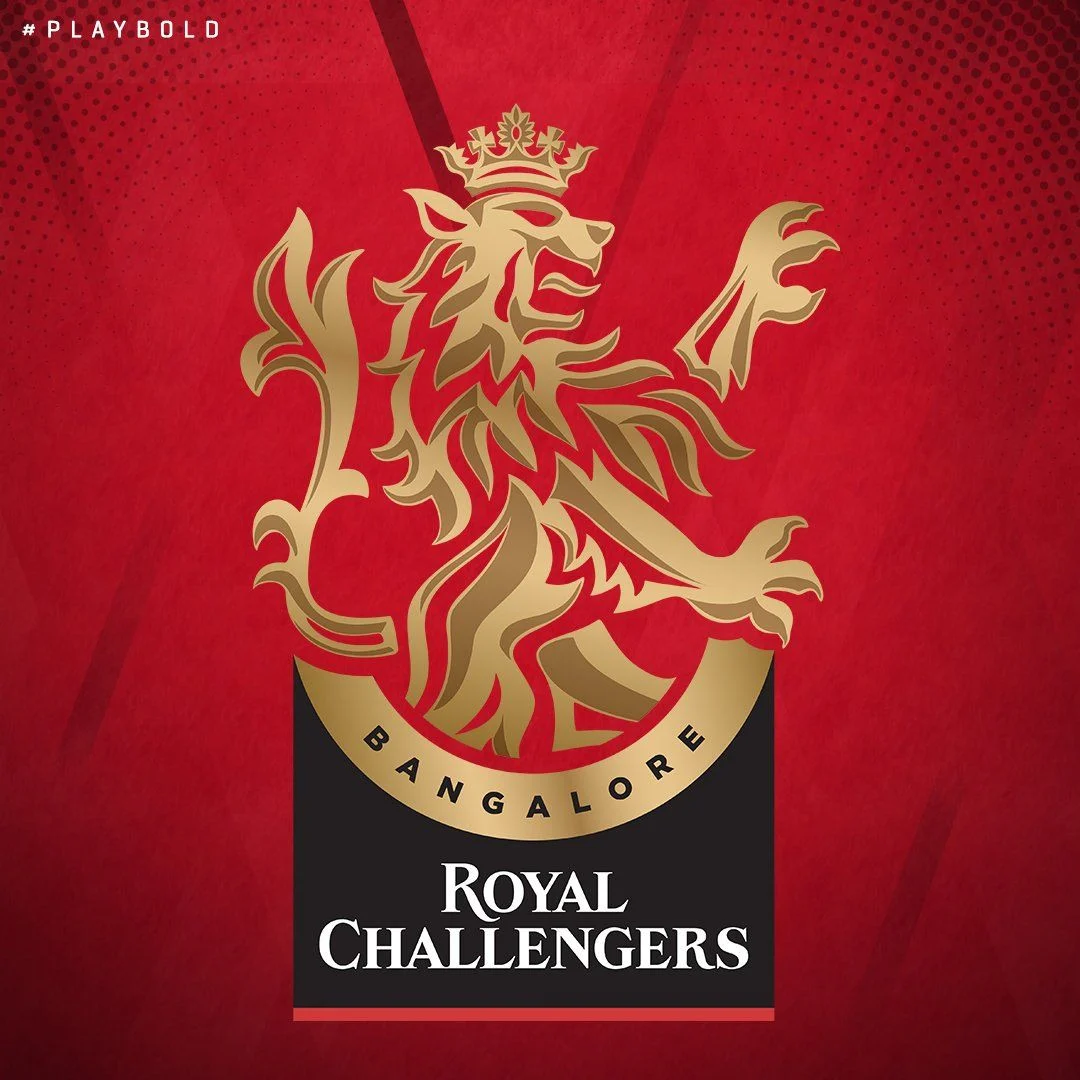

In [266]:
RCB = pd.read_excel('RCB.xlsx')
RCB.head(3)

,id,season,city,date,team1,Pplay T1,pplay twick1,team2,Pplay T2,pplay twick2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,22003,2022,Mumbai,2022-03-27,Royal Challengers Bangalore,41,0,Punjab Kings,63,0,Punjab Kings,Bowl,normal,0,Punjab Kings,0,5,Odean Smith,Dr. DY Patil Stadium
1,22006,2022,Mumbai,2022-03-30,Royal Challengers Bangalore,36,3,Kolkata Knight Riders,44,3,Royal Challengers Bangalore,Bowl,normal,0,Royal Challengers Bangalore,0,3,Wanindu Hasaranga,Dr. DY Patil Stadium
2,22013,2022,Mumbai,2022-04-05,Royal Challengers Bangalore,48,0,Rajasthan Royals,35,1,Royal Challengers Bangalore,Bowl,normal,0,Royal Challengers Bangalore,0,4,Dinesh Karthik,Wankhade Stadium


In [267]:
PP_Batting(RCB)

<---------------------------Number of Wins Team Wise-------------------------------->
Royal Challengers Bangalore    9
Punjab Kings                   2
Rajasthan Royals               2
Chennai Super Kings            1
Sunrisers Hyderabad            1
Gujarat Titans                 1
Name: winner, dtype: int64
<-----------------------Batting Powerplay Stats------------------------------------->
Toss Wins 
 toss_decision  toss_winner                
Bat            Royal Challengers Bangalore    2
               Gujarat Titans                 1
Bowl           Royal Challengers Bangalore    6
               Lucknow Super Giants           2
               Chennai Super Kings            1
               Delhi Capitals                 1
               Punjab Kings                   1
               Rajasthan Royals               1
               Sunrisers Hyderabad            1
Name: toss_winner, dtype: int64
<--------------------------------------------------------------->
Player of the Matc

,Matches Played,Runs Scored in PP,wickets_lost,Average Powerplay Score,Runs Per Over,Highest Score in PP,Lowest Score in PP,Number of times Wicketless in PP,Max Wickets lost,No. of Times Score > Mean PP Score
Value,16.0,696.0,23.0,43.5,7.25,57.0,30.0,5.0,4.0,8.0


In [269]:
PP_Bowling(RCB)

,Matches Played,Runs Conceeded,Wickets Picked,Economy,Total Overs Bowled,Lowest Conceeded Runs,Highest Conceeded Runs,Max Wickets Picked in PP
Value,16.0,812.0,19.0,8.458333,96.0,35.0,83.0,3.0


#### Overall Powerplay Runs & Wickets Stats of RCB vs Other Teams

<AxesSubplot:title={'center':'Wickets Picked by RCB Vs Each Team'}, ylabel='team2'>

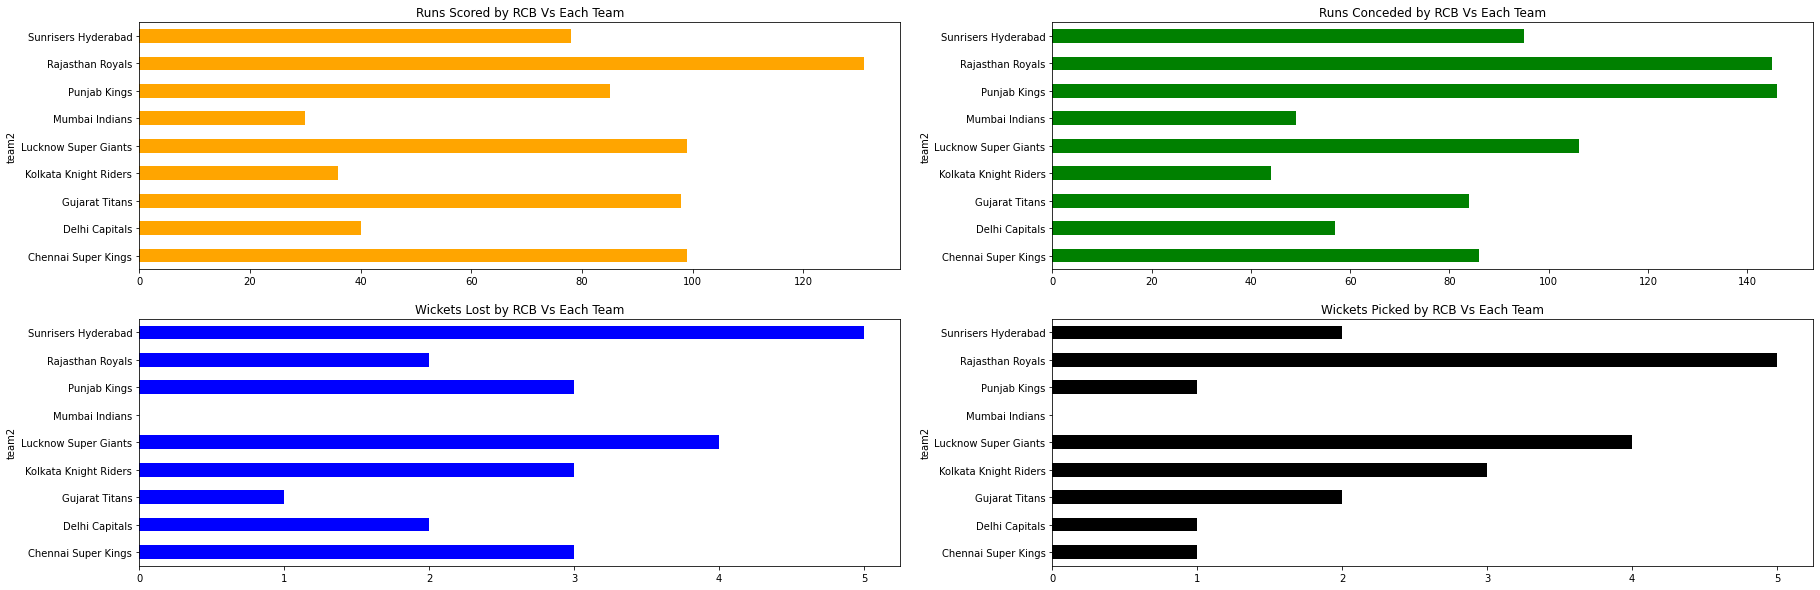

In [270]:
fig, axarr = plt.subplots(2, 2, figsize=(30,10))
RCB.groupby(['team2'])['Pplay T1'].sum().plot(kind="barh",color = "Orange",ax=axarr[0][0],title="Runs Scored by RCB Vs Each Team")
RCB.groupby(['team2'])['Pplay T2'].sum().plot(kind="barh",color = "Green",ax=axarr[0][1],title="Runs Conceded by RCB Vs Each Team")
RCB.groupby(['team2'])['pplay twick1'].sum().plot(kind="barh",color = "Blue",ax=axarr[1][0],title="Wickets Lost by RCB Vs Each Team")
RCB.groupby(['team2'])['pplay twick2'].sum().plot(kind="barh",color = "Black",ax=axarr[1][1],title="Wickets Picked by RCB Vs Each Team")

#### -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

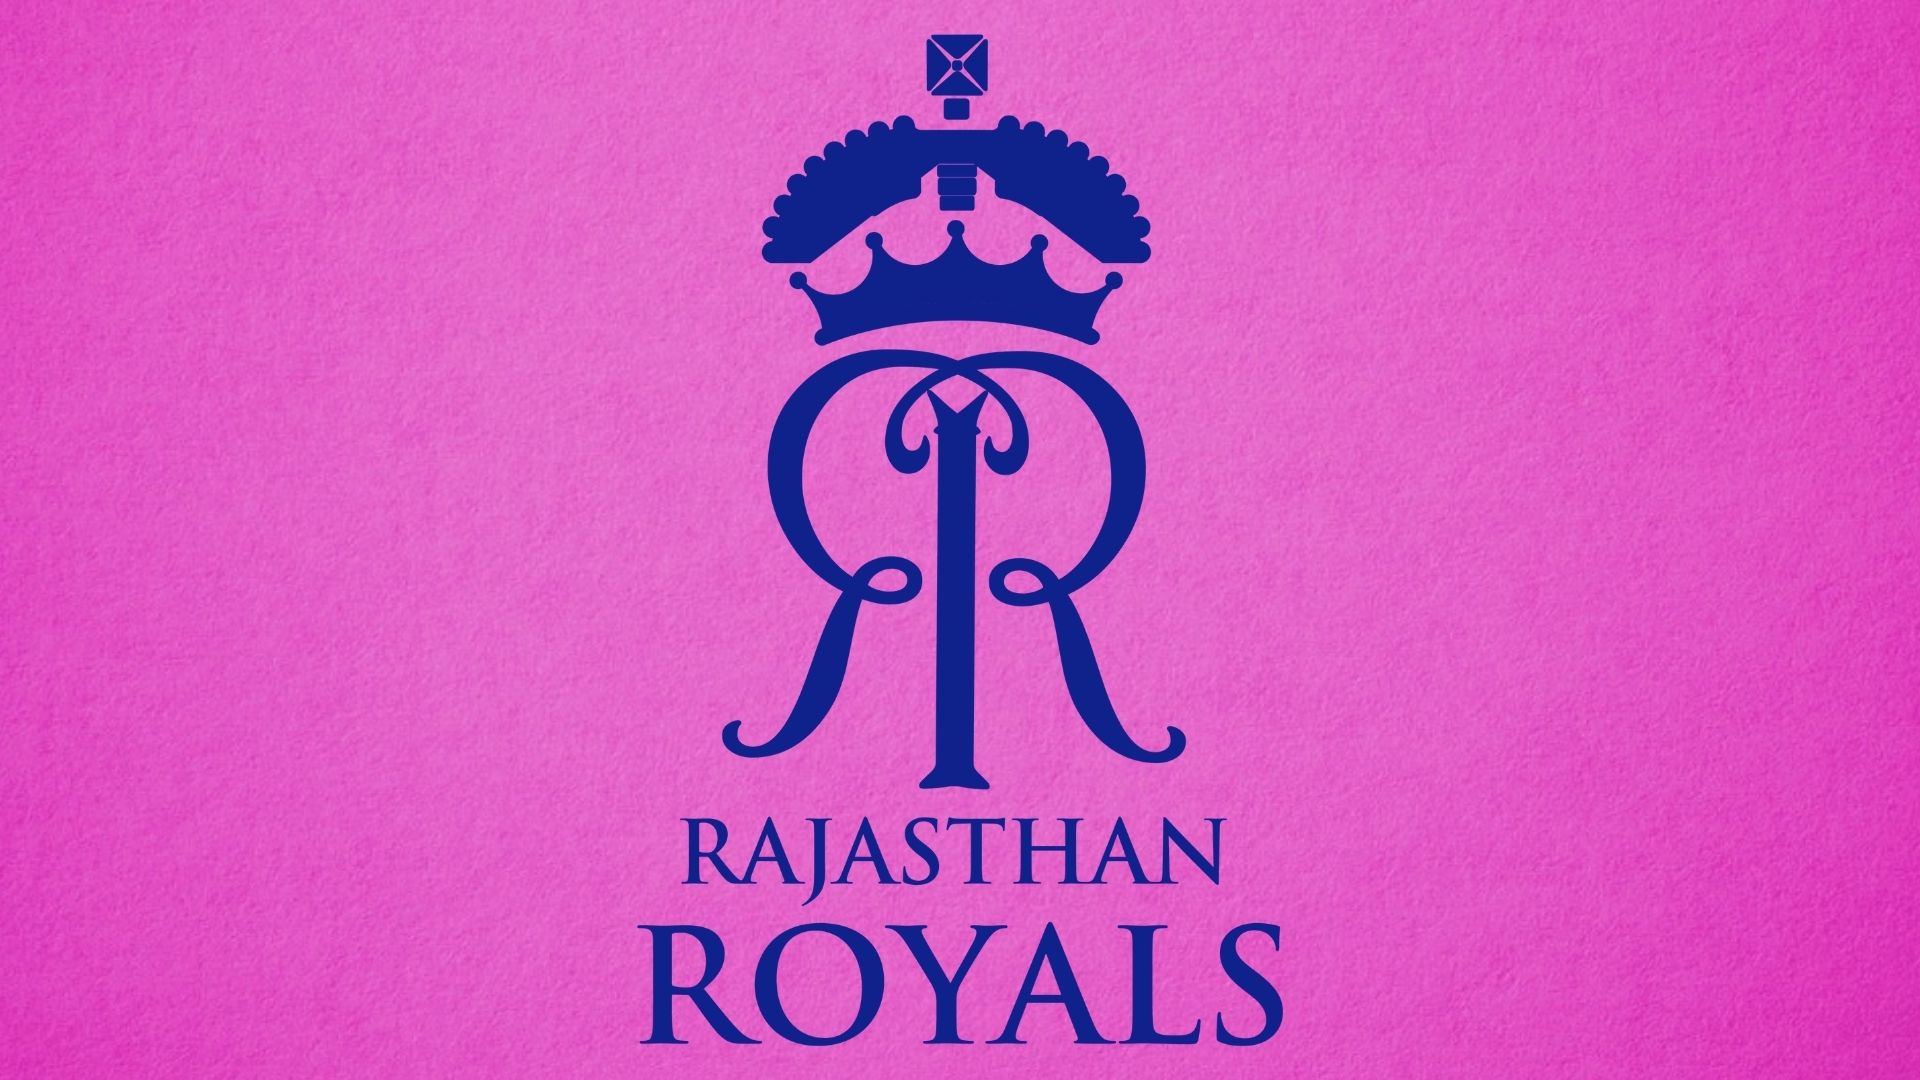

In [273]:
RR = pd.read_excel('RR.xlsx')
RR.head(3)

,id,season,city,date,team1,Pplay T1,pplay twick1,team2,Pplay T2,pplay twick2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,22005,2022,Pune,2022-03-29,Rajasthan Royals,58,0,Sunrisers Hyderabad,14,3,Sunrisers Hyderabad,Bowl,normal,0,Rajasthan Royals,61,0,Sanju Samson,"Maharastra Cricket Association, Pune"
1,22009,2022,Mumbai,2022-04-02,Rajasthan Royals,48,2,Mumbai Indians,50,2,Mumbai Indians,Bowl,normal,0,Rajasthan Royals,23,0,Jos Buttler,Dr. DY Patil Stadium
2,22013,2022,Mumbai,2022-04-05,Rajasthan Royals,35,1,Royal Challengers Bangalore,48,0,Royal Challengers Bangalore,Bowl,normal,0,Royal Challengers Bangalore,0,4,Dinesh Karthik,"Maharastra Cricket Association, Pune"


In [274]:
PP_Batting(RR)

<---------------------------Number of Wins Team Wise-------------------------------->
Rajasthan Royals               10
Gujarat Titans                  3
Kolkata Knight Riders           1
Delhi Capitals                  1
Royal Challengers Bangalore     1
Mumbai Indians                  1
Name: winner, dtype: int64
<-----------------------Batting Powerplay Stats------------------------------------->
Toss Wins 
 toss_decision  toss_winner                
Bat            Rajasthan Royals               2
               Chennai Super Kings            1
               Punjab Kings                   1
Bowl           Delhi Capitals                 2
               Kolkata Knight Riders          2
               Mumbai Indians                 2
               Rajasthan Royals               2
               Royal Challengers Bangalore    2
               Gujarat Titans                 1
               Lucknow Super Giants           1
               Sunrisers Hyderabad            1
Name: toss_win

,Matches Played,Runs Scored in PP,wickets_lost,Average Powerplay Score,Runs Per Over,Highest Score in PP,Lowest Score in PP,Number of times Wicketless in PP,Max Wickets lost,No. of Times Score > Mean PP Score
Value,17.0,854.0,19.0,50.235294,8.372549,67.0,35.0,3.0,3.0,8.0


In [277]:
PP_Bowling(RR)

,Matches Played,Runs Conceeded,Wickets Picked,Economy,Total Overs Bowled,Lowest Conceeded Runs,Highest Conceeded Runs,Max Wickets Picked in PP
Value,17.0,743.0,27.0,7.284314,102.0,14.0,75.0,3.0


#### Overall Powerplay Runs & Wickets Stats of RR vs Other Teams

<AxesSubplot:title={'center':'Wickets Picked by RR Vs Each Team'}, ylabel='team2'>

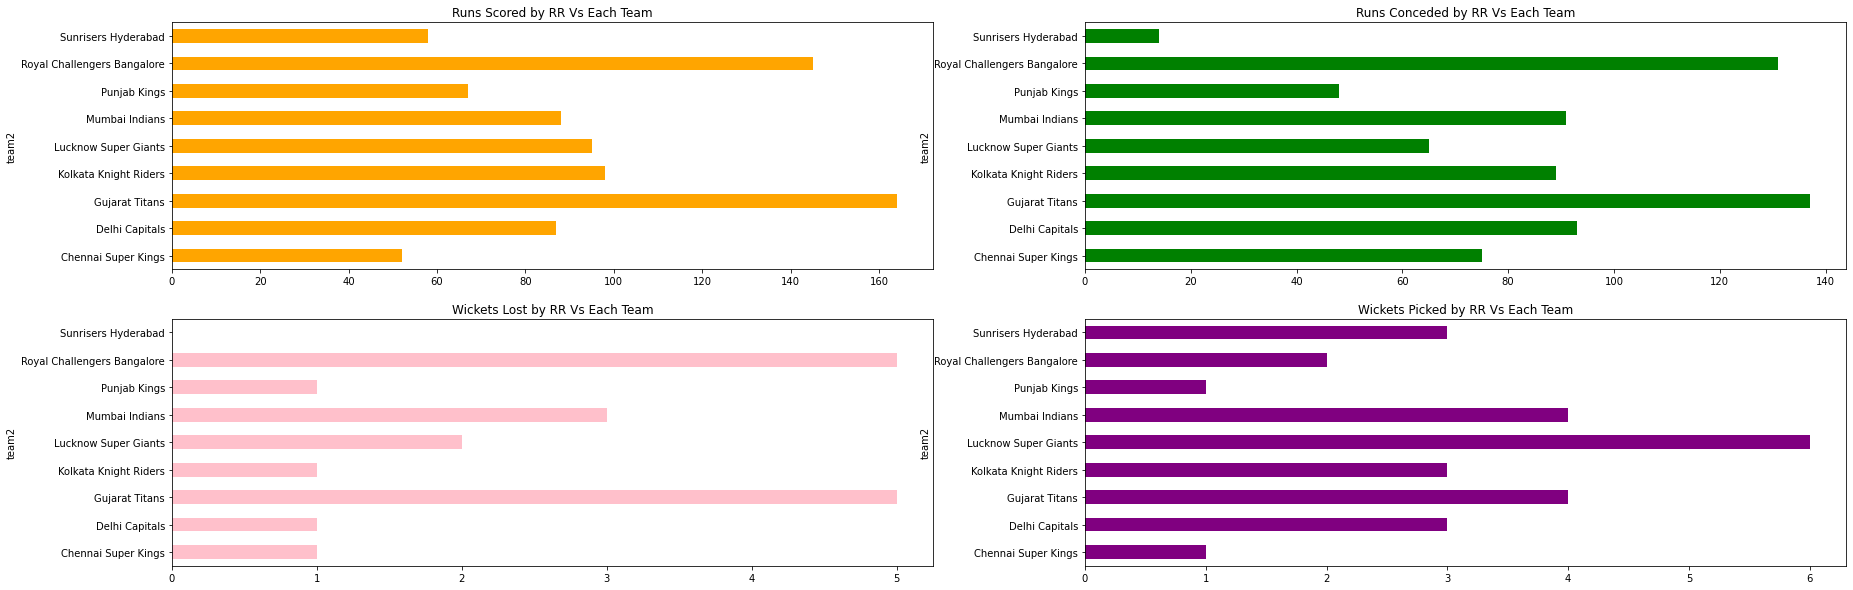

In [278]:
fig, axarr = plt.subplots(2, 2, figsize=(30,10))
RR.groupby(['team2'])['Pplay T1'].sum().plot(kind="barh",color = "Orange",ax=axarr[0][0],title="Runs Scored by RR Vs Each Team")
RR.groupby(['team2'])['Pplay T2'].sum().plot(kind="barh",color = "Green",ax=axarr[0][1],title="Runs Conceded by RR Vs Each Team")
RR.groupby(['team2'])['pplay twick1'].sum().plot(kind="barh",color = "Pink",ax=axarr[1][0],title="Wickets Lost by RR Vs Each Team")
RR.groupby(['team2'])['pplay twick2'].sum().plot(kind="barh",color = "Purple",ax=axarr[1][1],title="Wickets Picked by RR Vs Each Team")

#### -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

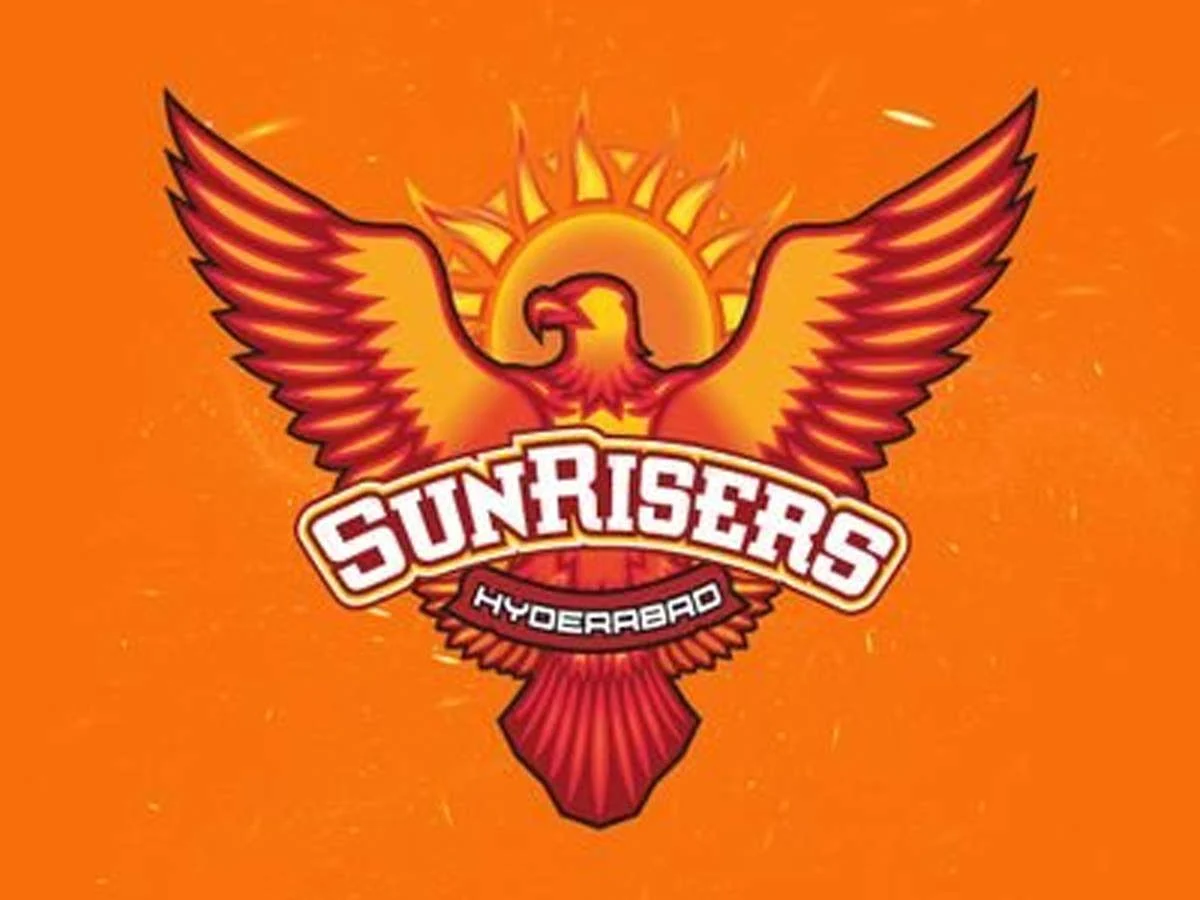

In [279]:
SRH = pd.read_excel("SRH.xlsx")
SRH.head(3)

,id,season,city,date,team1,Pplay T1,pplay twick1,team2,Pplay T2,pplay twick2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,22005,2022,Pune,2022-03-29,Sunrisers Hyderabad,14,3,Rajasthan Royals,58,0,Sunrisers Hyderabad,Bowl,normal,0,Rajasthan Royals,61,0,Sanju Samson,"Maharastra Cricket Association, Pune"
1,22012,2022,Mumbai,2022-04-04,Sunrisers Hyderabad,40,2,Lucknow Super Giants,32,3,Sunrisers Hyderabad,Bowl,normal,0,Lucknow Super Giants,12,0,Avesh Khan,Dr. DY Patil Stadium
2,22017,2022,Mumbai,2022-04-09,Sunrisers Hyderabad,37,0,Chennai Super Kings,41,2,Sunrisers Hyderabad,Bowl,normal,0,Sunrisers Hyderabad,0,8,Abhishek Sharma,Dr. DY Patil Stadium


In [280]:
PP_Batting(SRH)

<---------------------------Number of Wins Team Wise-------------------------------->
Sunrisers Hyderabad            6
Chennai Super Kings            1
Gujarat Titans                 1
Rajasthan Royals               1
Lucknow Super Giants           1
Punjab Kings                   1
Kolkata Knight Riders          1
Royal Challengers Bangalore    1
Delhi Capitals                 1
Name: winner, dtype: int64
<-----------------------Batting Powerplay Stats------------------------------------->
Toss Wins 
 toss_decision  toss_winner                
Bat            Kolkata Knight Riders          1
               Mumbai Indians                 1
               Royal Challengers Bangalore    1
               Sunrisers Hyderabad            1
Bowl           Sunrisers Hyderabad            9
               Gujarat Titans                 1
Name: toss_winner, dtype: int64
<--------------------------------------------------------------->
Player of the Match
<------------------------------------------

,Matches Played,Runs Scored in PP,wickets_lost,Average Powerplay Score,Runs Per Over,Highest Score in PP,Lowest Score in PP,Number of times Wicketless in PP,Max Wickets lost,No. of Times Score > Mean PP Score
Value,14.0,590.0,19.0,42.142857,7.02381,58.0,14.0,3.0,3.0,6.0


In [282]:
PP_Bowling(SRH)

,Matches Played,Runs Conceeded,Wickets Picked,Economy,Total Overs Bowled,Lowest Conceeded Runs,Highest Conceeded Runs,Max Wickets Picked in PP
Value,14.0,663.0,21.0,7.892857,84.0,31.0,62.0,4.0


#### Overall Powerplay Runs & Wickets Stats of SRH vs Other Teams

<AxesSubplot:title={'center':'Wickets Picked by SRH Vs Each Team'}, ylabel='team2'>

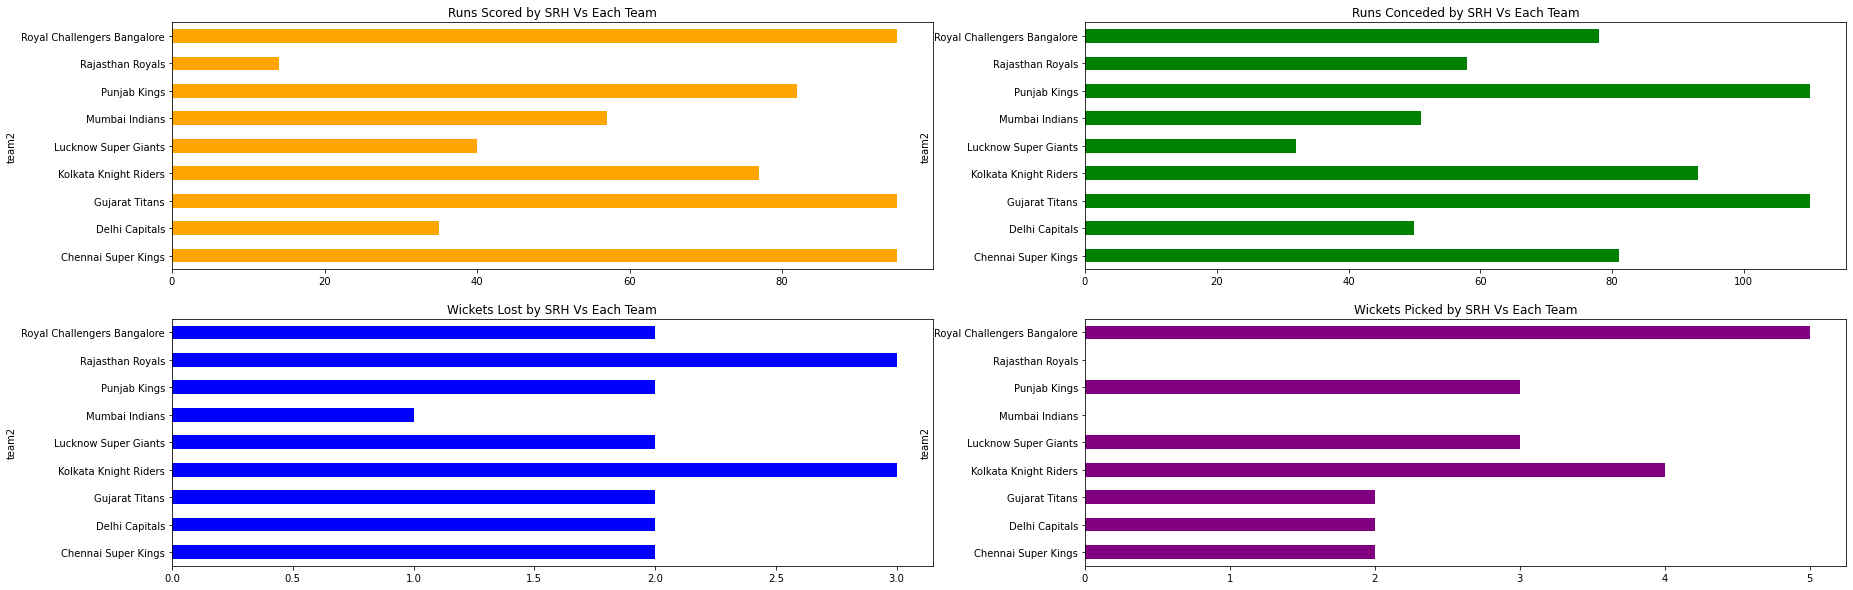

In [283]:
fig, axaSRH = plt.subplots(2, 2, figsize=(30,10))
SRH.groupby(['team2'])['Pplay T1'].sum().plot(kind="barh",color = "Orange",ax=axaSRH[0][0],title="Runs Scored by SRH Vs Each Team")
SRH.groupby(['team2'])['Pplay T2'].sum().plot(kind="barh",color = "Green",ax=axaSRH[0][1],title="Runs Conceded by SRH Vs Each Team")
SRH.groupby(['team2'])['pplay twick1'].sum().plot(kind="barh",color = "Blue",ax=axaSRH[1][0],title="Wickets Lost by SRH Vs Each Team")
SRH.groupby(['team2'])['pplay twick2'].sum().plot(kind="barh",color = "Purple",ax=axaSRH[1][1],title="Wickets Picked by SRH Vs Each Team")

#### -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

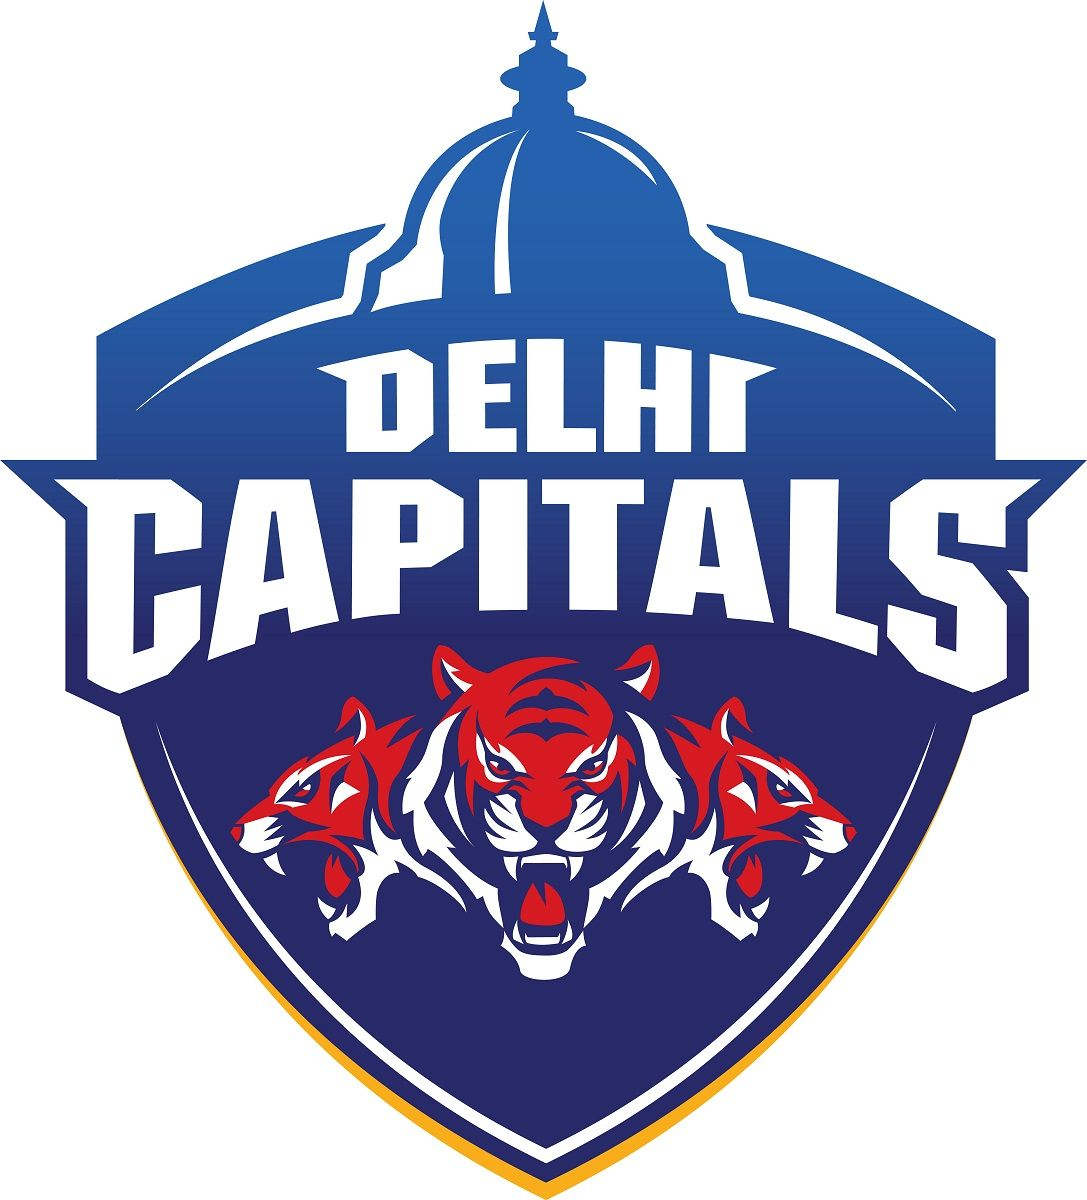

In [286]:
DC = pd.read_excel('DC.xlsx')
DC.head(3)

,id,season,city,date,team1,Pplay T1,pplay twick1,team2,Pplay T2,pplay twick2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,22002,2022,Mumbai,2022-03-27 00:00:00,Delhi Capitals,46,3,Mumbai Indians,53,0,Delhi Capitals,Bowl,normal,0,Delhi Capitals,0,4,Kuldeep Yadav,Brabourne Stadium
1,22010,2022,Pune,2022-04-02 00:00:00,Delhi Capitals,43,3,Gujarat Titans,44,1,Delhi Capitals,Bowl,normal,0,Gujarat Titans,14,0,Lockie Ferguson,"Maharastra Cricket Association, Pune"
2,22015,2022,Mumbai,2022-04-07 00:00:00,Delhi Capitals,52,0,Lucknow Super Giants,48,0,Lucknow Super Giants,Bowl,normal,0,Lucknow Super Giants,0,6,Q De Cock,Dr. DY Patil Stadium


In [287]:
PP_Batting(DC)

<---------------------------Number of Wins Team Wise-------------------------------->
Delhi Capitals                 7
Lucknow Super Giants           2
Chennai Super Kings            1
Mumbai Indians                 1
Gujarat Titans                 1
Rajasthan Royals               1
Royal Challengers Bangalore    1
Name: winner, dtype: int64
<-----------------------Batting Powerplay Stats------------------------------------->
Toss Wins 
 toss_decision  toss_winner          
Bat            Lucknow Super Giants     1
Bowl           Delhi Capitals           8
               Kolkata Knight Riders    1
               Lucknow Super Giants     1
               Mumbai Indians           1
               Punjab Kings             1
               Sunrisers Hyderabad      1
Name: toss_winner, dtype: int64
<--------------------------------------------------------------->
Player of the Match
<--------------------------------------------------------------->
Man of the Match 
 Kuldeep Yadav      4
Mit

,Matches Played,Runs Scored in PP,wickets_lost,Average Powerplay Score,Runs Per Over,Highest Score in PP,Lowest Score in PP,Number of times Wicketless in PP,Max Wickets lost,No. of Times Score > Mean PP Score
Value,14.0,758.0,23.0,54.142857,9.02381,81.0,37.0,3.0,3.0,7.0


In [288]:
PP_Bowling(DC)

,Matches Played,Runs Conceeded,Wickets Picked,Economy,Total Overs Bowled,Lowest Conceeded Runs,Highest Conceeded Runs,Max Wickets Picked in PP
Value,14.0,621.0,18.0,7.392857,84.0,27.0,57.0,3.0


#### Overall Powerplay Runs & Wickets Stats of DC vs Other Teams

<AxesSubplot:title={'center':'Wickets Picked by DC Vs Each Team'}, ylabel='team2'>

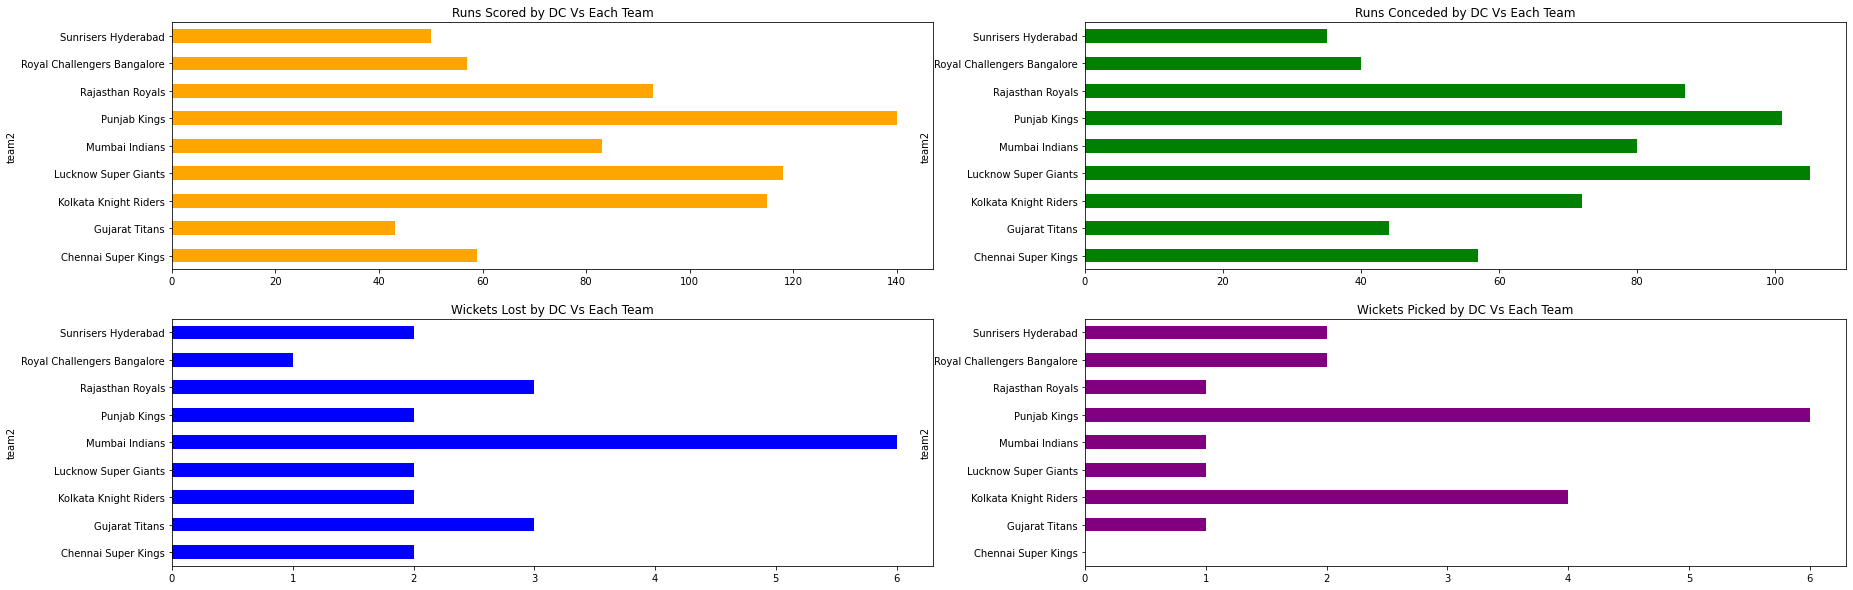

In [289]:
fig, axaDC = plt.subplots(2, 2, figsize=(30,10))
DC.groupby(['team2'])['Pplay T1'].sum().plot(kind="barh",color = "Orange",ax=axaDC[0][0],title="Runs Scored by DC Vs Each Team")
DC.groupby(['team2'])['Pplay T2'].sum().plot(kind="barh",color = "Green",ax=axaDC[0][1],title="Runs Conceded by DC Vs Each Team")
DC.groupby(['team2'])['pplay twick1'].sum().plot(kind="barh",color = "Blue",ax=axaDC[1][0],title="Wickets Lost by DC Vs Each Team")
DC.groupby(['team2'])['pplay twick2'].sum().plot(kind="barh",color = "Purple",ax=axaDC[1][1],title="Wickets Picked by DC Vs Each Team")

#### -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

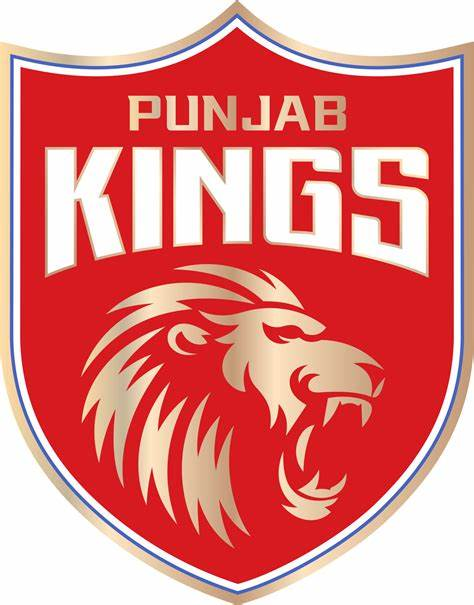

In [290]:
PBKS = pd.read_excel('PBKS.xlsx')
PBKS.head(3)

,id,season,city,date,team1,Pplay T1,pplay twick1,team2,Pplay T2,pplay twick2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,22003,2022,Mumbai,2022-03-27,Punjab Kings,63,0,Royal Challengers Bangalore,41,0,Punjab Kings,Bowl,normal,0,Punjab Kings,0,5,Odean Smith,Dr. DY Patil Stadium
1,22008,2022,Mumbai,2022-04-01,Punjab Kings,62,3,Kolkata Knight Riders,51,2,Kolkata Knight Riders,Bowl,normal,0,Kolkata Knight Riders,0,6,Umesh Yadav,Wankhade Stadium
2,22011,2022,Mumbai,2022-04-03,Punjab Kings,72,2,Chennai Super Kings,27,4,Chennai Super Kings,Bowl,normal,0,Punjab Kings,54,0,Liam Livingstone,Brabourne Stadium


In [291]:
PP_Batting(PBKS)

<---------------------------Number of Wins Team Wise-------------------------------->
Punjab Kings             7
Delhi Capitals           2
Sunrisers Hyderabad      1
Rajasthan Royals         1
Lucknow Super Giants     1
Kolkata Knight Riders    1
Gujarat Titans           1
Name: winner, dtype: int64
<-----------------------Batting Powerplay Stats------------------------------------->
Toss Wins 
 toss_decision  toss_winner                
Bat            Gujarat Titans                 1
               Punjab Kings                   1
               Sunrisers Hyderabad            1
Bowl           Punjab Kings                   3
               Chennai Super Kings            2
               Delhi Capitals                 1
               Gujarat Titans                 1
               Kolkata Knight Riders          1
               Mumbai Indians                 1
               Royal Challengers Bangalore    1
               Sunrisers Hyderabad            1
Name: toss_winner, dtype: int

,Matches Played,Runs Scored in PP,wickets_lost,Average Powerplay Score,Runs Per Over,Highest Score in PP,Lowest Score in PP,Number of times Wicketless in PP,Max Wickets lost,No. of Times Score > Mean PP Score
Value,14.0,773.0,21.0,55.214286,9.202381,83.0,37.0,2.0,3.0,6.0


In [292]:
PP_Bowling(PBKS)

,Matches Played,Runs Conceeded,Wickets Picked,Economy,Total Overs Bowled,Lowest Conceeded Runs,Highest Conceeded Runs,Max Wickets Picked in PP
Value,14.0,660.0,22.0,7.857143,84.0,27.0,81.0,4.0


#### Overall Powerplay Runs & Wickets Stats of PBKS vs Other Teams

<AxesSubplot:title={'center':'Wickets Picked by PBKS Vs Each Team'}, ylabel='team2'>

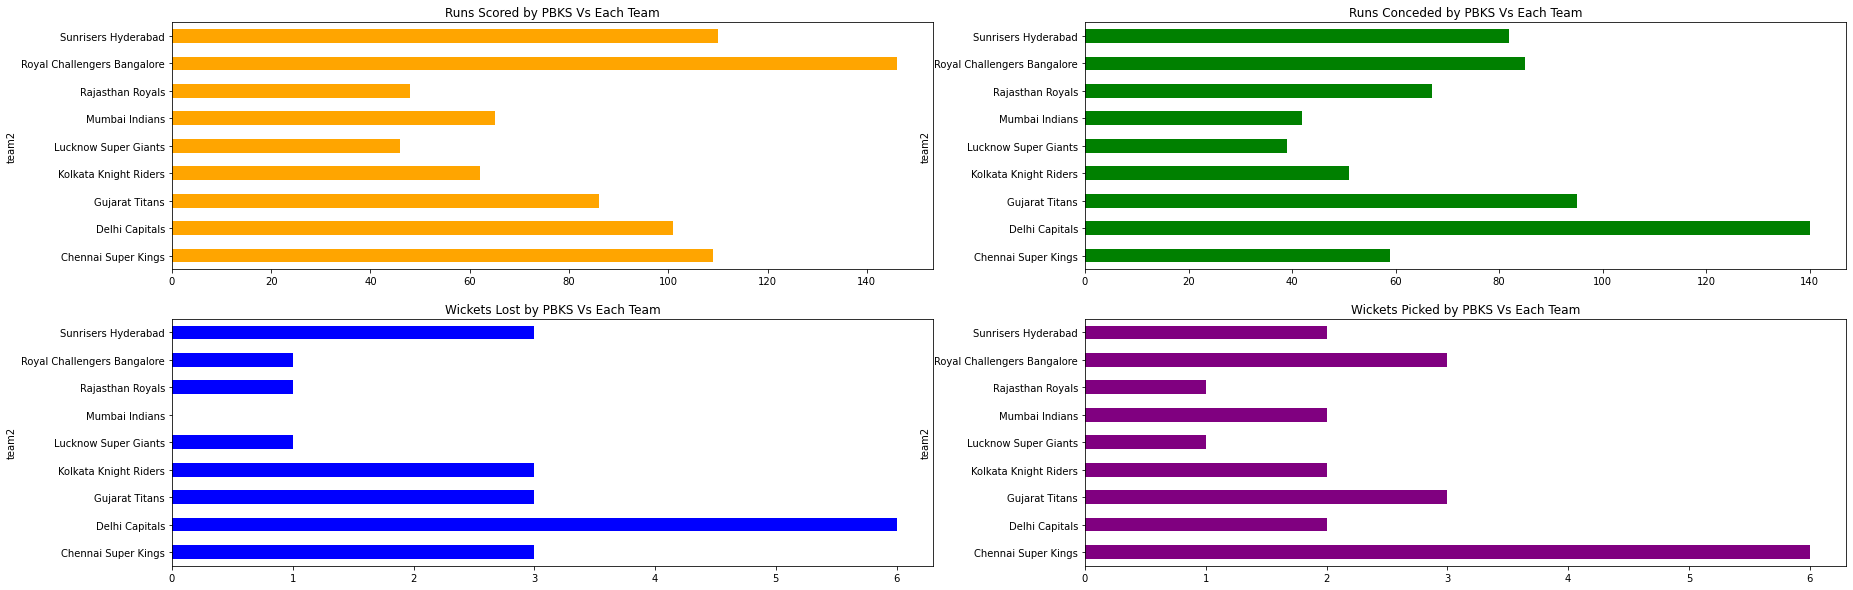

In [293]:
fig, axaPBKS = plt.subplots(2, 2, figsize=(30,10))
PBKS.groupby(['team2'])['Pplay T1'].sum().plot(kind="barh",color = "Orange",ax=axaPBKS[0][0],title="Runs Scored by PBKS Vs Each Team")
PBKS.groupby(['team2'])['Pplay T2'].sum().plot(kind="barh",color = "Green",ax=axaPBKS[0][1],title="Runs Conceded by PBKS Vs Each Team")
PBKS.groupby(['team2'])['pplay twick1'].sum().plot(kind="barh",color = "Blue",ax=axaPBKS[1][0],title="Wickets Lost by PBKS Vs Each Team")
PBKS.groupby(['team2'])['pplay twick2'].sum().plot(kind="barh",color = "Purple",ax=axaPBKS[1][1],title="Wickets Picked by PBKS Vs Each Team")

#### -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

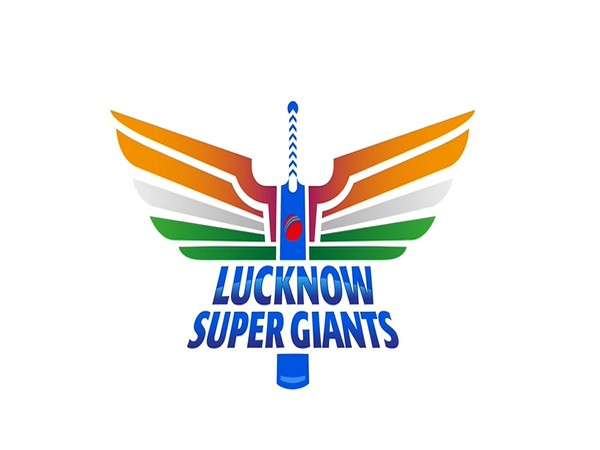

In [294]:
LSG = pd.read_excel('LSG.xlsx')
LSG.head(3)

,id,season,city,date,team1,Pplay T1,pplay twick1,team2,Pplay T2,pplay twick2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,22004,2022,Mumbai,2022-03-28 00:00:00,Lucknow Super Giants,32,4,Gujarat Titans,44,2,Gujarat Titans,Bowl,normal,0,Gujarat Titans,0,5,Mohammad Shami,Wankhade Stadium
1,22007,2022,Mumbai,2022-03-31 00:00:00,Lucknow Super Giants,55,0,Chennai Super Kings,73,1,Lucknow Super Giants,Bowl,normal,0,Lucknow Super Giants,0,6,Evin Lewis,Brabourne Stadium
2,22012,2022,Mumbai,2022-04-04 00:00:00,Lucknow Super Giants,32,3,Sunrisers Hyderabad,40,2,Sunrisers Hyderabad,Bowl,normal,0,Lucknow Super Giants,12,0,Avesh Khan,Dr. DY Patil Stadium


In [295]:
PP_Batting(LSG)

<---------------------------Number of Wins Team Wise-------------------------------->
Lucknow Super Giants           8
Royal Challengers Bangalore    2
Gujarat Titans                 2
Rajasthan Royals               2
Kolkata Knight Riders          1
Name: winner, dtype: int64
<-----------------------Batting Powerplay Stats------------------------------------->
Toss Wins 
 toss_decision  toss_winner          
Bat            Lucknow Super Giants     2
               Gujarat Titans           1
               Rajasthan Royals         1
Bowl           Lucknow Super Giants     5
               Mumbai Indians           2
               Gujarat Titans           1
               Kolkata Knight Riders    1
               Punjab Kings             1
               Sunrisers Hyderabad      1
Name: toss_winner, dtype: int64
<--------------------------------------------------------------->
Player of the Match
<--------------------------------------------------------------->
Man of the Match 
 Avesh 

,Matches Played,Runs Scored in PP,wickets_lost,Average Powerplay Score,Runs Per Over,Highest Score in PP,Lowest Score in PP,Number of times Wicketless in PP,Max Wickets lost,No. of Times Score > Mean PP Score
Value,15.0,670.0,25.0,44.666667,7.444444,66.0,31.0,3.0,4.0,6.0


In [296]:
PP_Bowling(LSG)

,Matches Played,Runs Conceeded,Wickets Picked,Economy,Total Overs Bowled,Lowest Conceeded Runs,Highest Conceeded Runs,Max Wickets Picked in PP
Value,15.0,735.0,23.0,8.166667,90.0,25.0,73.0,3.0


#### Overall Powerplay Runs & Wickets Stats of LSG vs Other Teams

<AxesSubplot:title={'center':'Wickets Picked by LSG Vs Each Team'}, ylabel='team2'>

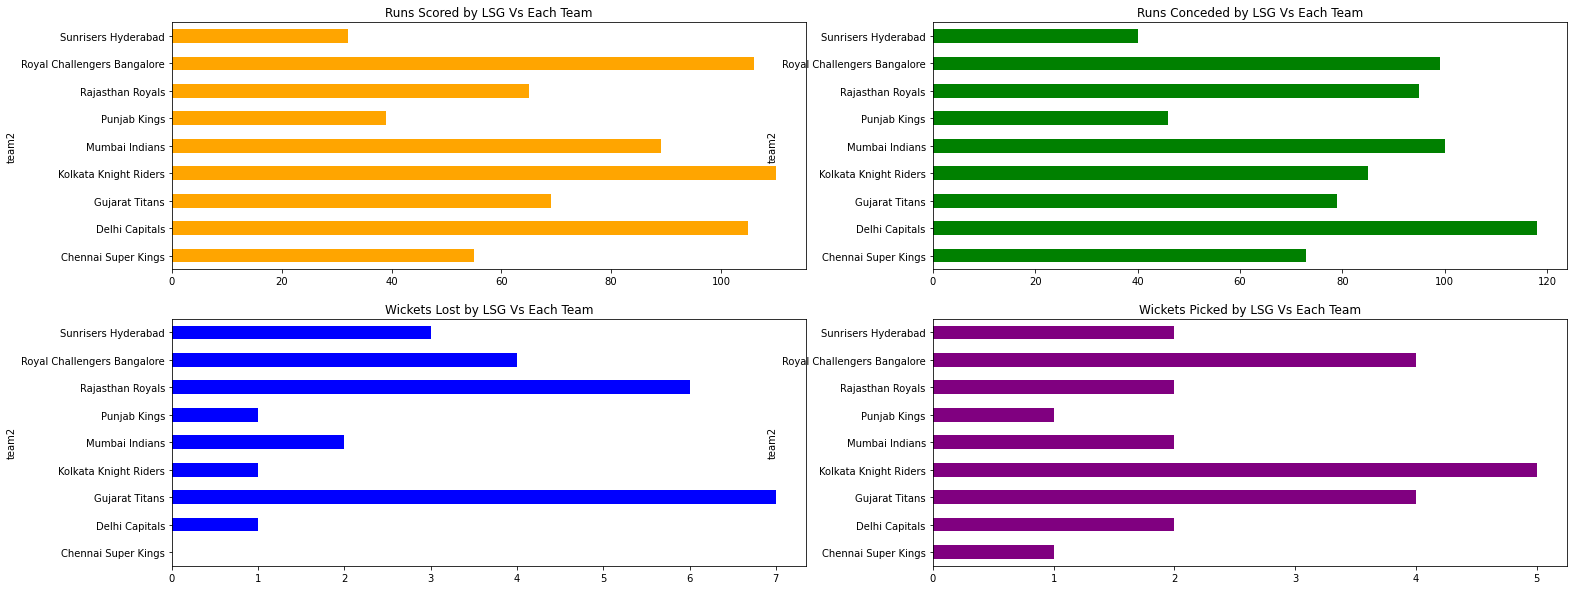

In [297]:
fig, axaLSG = plt.subplots(2, 2, figsize=(25,10))
LSG.groupby(['team2'])['Pplay T1'].sum().plot(kind="barh",color = "Orange",ax=axaLSG[0][0],title="Runs Scored by LSG Vs Each Team")
LSG.groupby(['team2'])['Pplay T2'].sum().plot(kind="barh",color = "Green",ax=axaLSG[0][1],title="Runs Conceded by LSG Vs Each Team")
LSG.groupby(['team2'])['pplay twick1'].sum().plot(kind="barh",color = "Blue",ax=axaLSG[1][0],title="Wickets Lost by LSG Vs Each Team")
LSG.groupby(['team2'])['pplay twick2'].sum().plot(kind="barh",color = "Purple",ax=axaLSG[1][1],title="Wickets Picked by LSG Vs Each Team")

#### -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

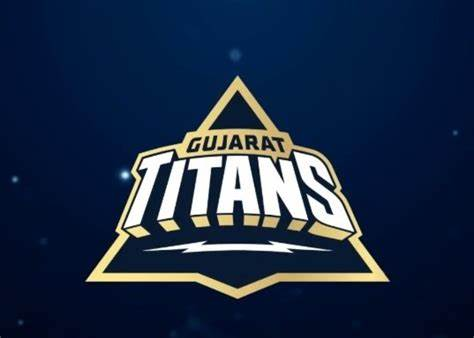

In [298]:
GT = pd.read_excel("GT.xlsx")
GT.head(3)

,id,season,city,date,team1,Pplay T1,pplay twick1,team2,Pplay T2,pplay twick2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,22004,2022,Mumbai,2022-03-28,Gujarat Titans,44,2,Lucknow Super Giants,32,4,Gujarat Titans,Bowl,normal,0,Gujarat Titans,0,5,Mohammad Shami,Wankhade Stadium
1,22010,2022,Pune,2022-04-02,Gujarat Titans,44,1,Delhi Capitals,43,3,Delhi Capitals,Bowl,normal,0,Gujarat Titans,14,0,Lockie Ferguson,"Maharastra Cricket Association, Pune"
2,22016,2022,Mumbai,2022-04-08,Gujarat Titans,53,1,Punjab Kings,43,2,Gujarat Titans,Bowl,normal,0,Gujarat Titans,0,6,Shubman Gill,Brabourne Stadium


In [299]:
PP_Batting(GT)

<---------------------------Number of Wins Team Wise-------------------------------->
Gujarat Titans                 12
Punjab Kings                    1
Sunrisers Hyderabad             1
Royal Challengers Bangalore     1
Mumbai Indians                  1
Name: winner, dtype: int64
<-----------------------Batting Powerplay Stats------------------------------------->
Toss Wins 
 toss_decision  toss_winner                
Bat            Gujarat Titans                 4
               Chennai Super Kings            1
               Rajasthan Royals               1
               Royal Challengers Bangalore    1
Bowl           Gujarat Titans                 6
               Delhi Capitals                 1
               Rajasthan Royals               1
               Sunrisers Hyderabad            1
Name: toss_winner, dtype: int64
<--------------------------------------------------------------->
Player of the Match
<--------------------------------------------------------------->
Man of t

,Matches Played,Runs Scored in PP,wickets_lost,Average Powerplay Score,Runs Per Over,Highest Score in PP,Lowest Score in PP,Number of times Wicketless in PP,Max Wickets lost,No. of Times Score > Mean PP Score
Value,16.0,740.0,20.0,46.25,7.708333,64.0,31.0,4.0,3.0,7.0


In [300]:
PP_Bowling(GT)

,Matches Played,Runs Conceeded,Wickets Picked,Economy,Total Overs Bowled,Lowest Conceeded Runs,Highest Conceeded Runs,Max Wickets Picked in PP
Value,16.0,738.0,27.0,7.6875,96.0,32.0,65.0,4.0


#### Overall Powerplay Runs & Wickets Stats of GT vs Other Teams

<AxesSubplot:title={'center':'Wickets Picked by GT Vs Each Team'}, ylabel='team2'>

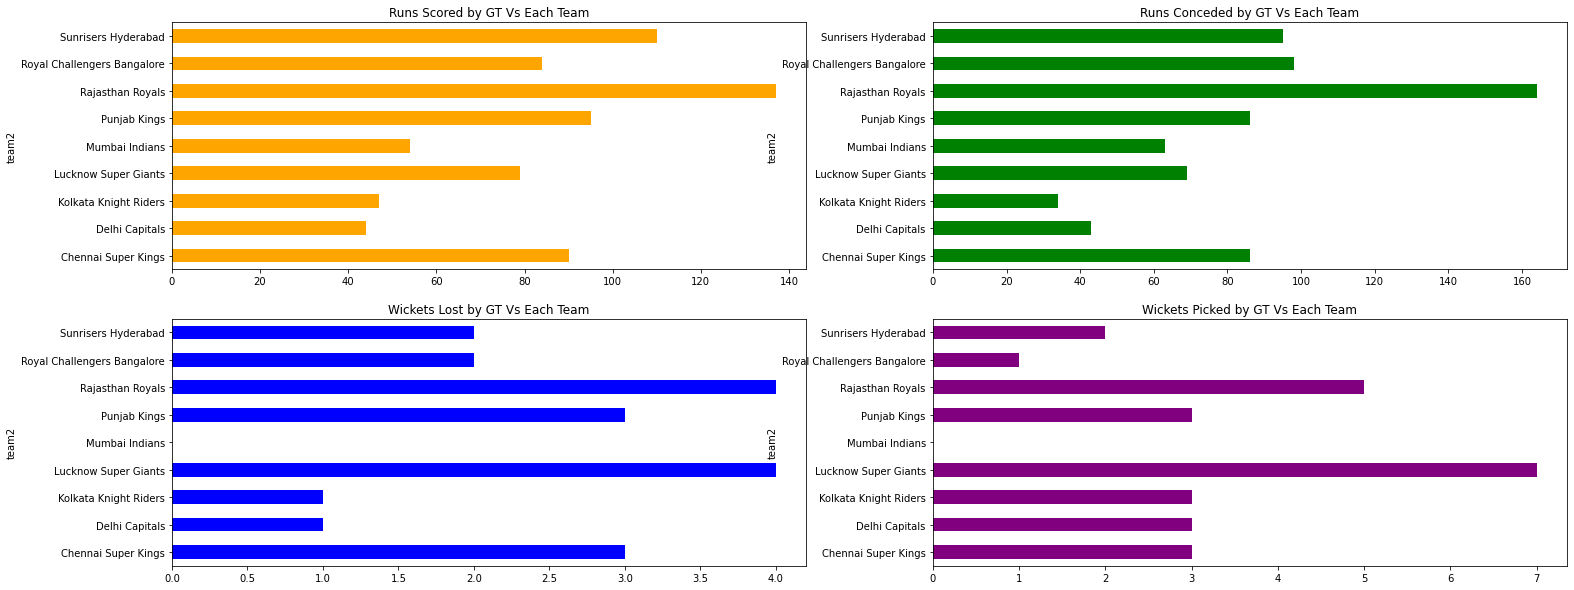

In [301]:
fig, axaGT = plt.subplots(2, 2, figsize=(25,10))
GT.groupby(['team2'])['Pplay T1'].sum().plot(kind="barh",color = "Orange",ax=axaGT[0][0],title="Runs Scored by GT Vs Each Team")
GT.groupby(['team2'])['Pplay T2'].sum().plot(kind="barh",color = "Green",ax=axaGT[0][1],title="Runs Conceded by GT Vs Each Team")
GT.groupby(['team2'])['pplay twick1'].sum().plot(kind="barh",color = "Blue",ax=axaGT[1][0],title="Wickets Lost by GT Vs Each Team")
GT.groupby(['team2'])['pplay twick2'].sum().plot(kind="barh",color = "Purple",ax=axaGT[1][1],title="Wickets Picked by GT Vs Each Team")

#### These are just a part of the analysis I have taken 🤐.
#### Especially focused on IPL Powerplay Statistics here. Tells which team have a great start in Powerplay and which team hasn't.
#### Still there's a scope of many stats if we drill down the data. 🤩